## TOC:
* [Simulation #1](#sim1)
* [Simulation #2](#sim2)
* [Simulation #3](#sim3)
* [Simulation #4](#sim4)
* [Simulation #5](#sim5)
* [Simulation #6](#sim6)
* [Simulation #7](#sim7)

# Simulation study
## Investigate the effects of the response distribution w.r.t the clustering groups with the model performance

### Function
Define a function that returns the *model* accuracy on the test data stored in the *partition* object

In [1]:
get.prediction.acc <- function(partition, model){
  coefs <- rbind(model$intercept, model$B)
  test.pred <- cbind(rep(1, times= nrow(partition$test$x)), scale(partition$test$x, center= colMeans(partition$train$x), scale= apply(partition$test$x, 2, FUN= sd))) %*% coefs

  normalized.test.y <- scale(partition$test$y, center= colMeans(partition$train$y), scale= apply(partition$test$y, 2, FUN= sd))
  test.cors.p <- sapply(seq(ncol(test.pred)), function(i) cor(test.pred[, i], normalized.test.y[, i], method= "pearson"))
  test.cors.s <- sapply(seq(ncol(test.pred)), function(i) cor(test.pred[, i], normalized.test.y[, i], method= "spearman"))
  return(list(test.pred= test.pred, test.cors.p= test.cors.p, test.cors.s= test.cors.s))
}

### Libraries

In [2]:
library(vioplot)
library(pheatmap)

Loading required package: sm
Package 'sm', version 2.2-5.4: type help(sm) for summary information


# Simulation #1 <a class="anchor" id="sim1"></a>

In [3]:
sim <- 1

## Data Visualization

In [4]:
x <- read.table(paste("~/G_MTL_sim/sim", sim, "_features.txt", sep= ""))
y <- read.table(paste("~/G_MTL_sim/sim", sim, "_responses.txt", sep= ""))
print(dim(x))
print(dim(y))

[1] 400  20
[1] 400   8


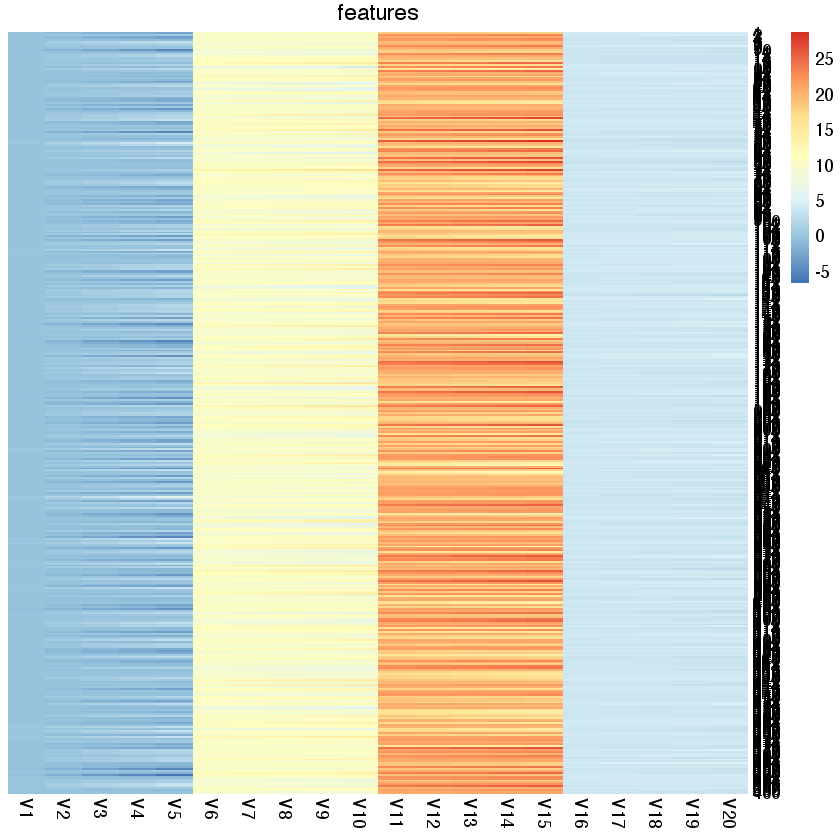

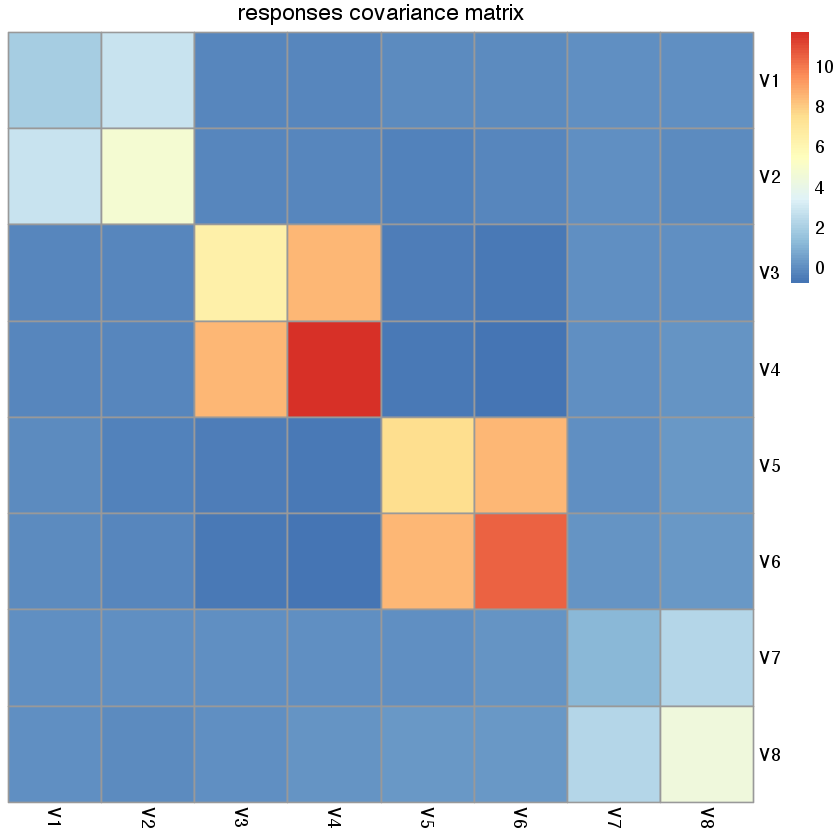

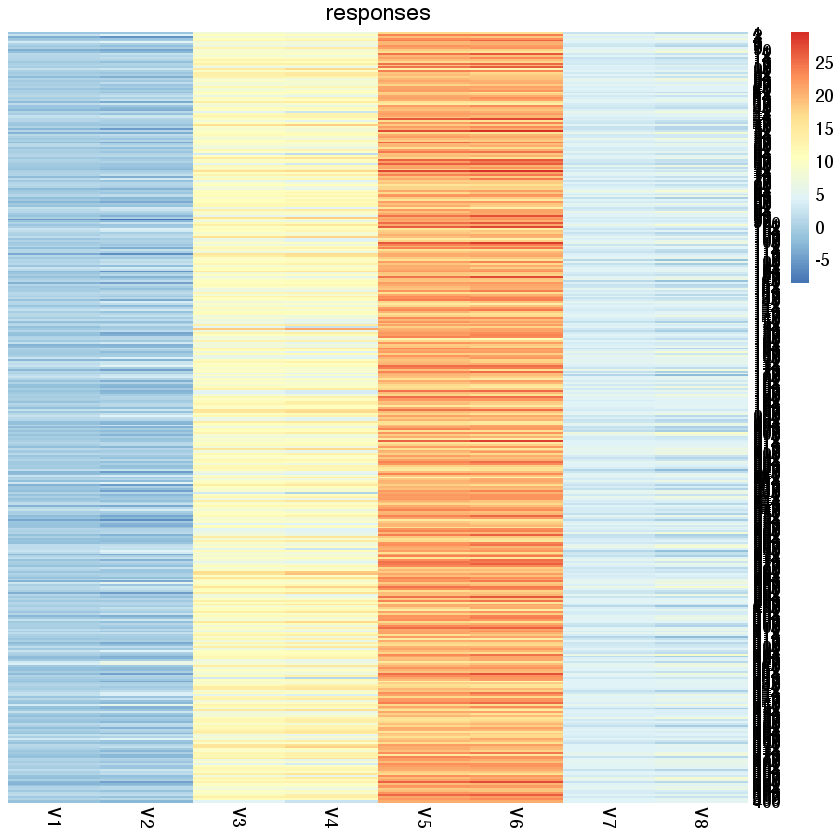

In [5]:
y.cov <- cov(y)
pheatmap(x, cluster_rows= F, cluster_cols= F, main= "features")
pheatmap(y.cov, cluster_rows= F, cluster_cols= F, main= "responses covariance matrix")
pheatmap(y, cluster_rows= F, cluster_cols= F, main= "responses")

## Plot the kmeans clusterin of the responses to inspect how much they overlap

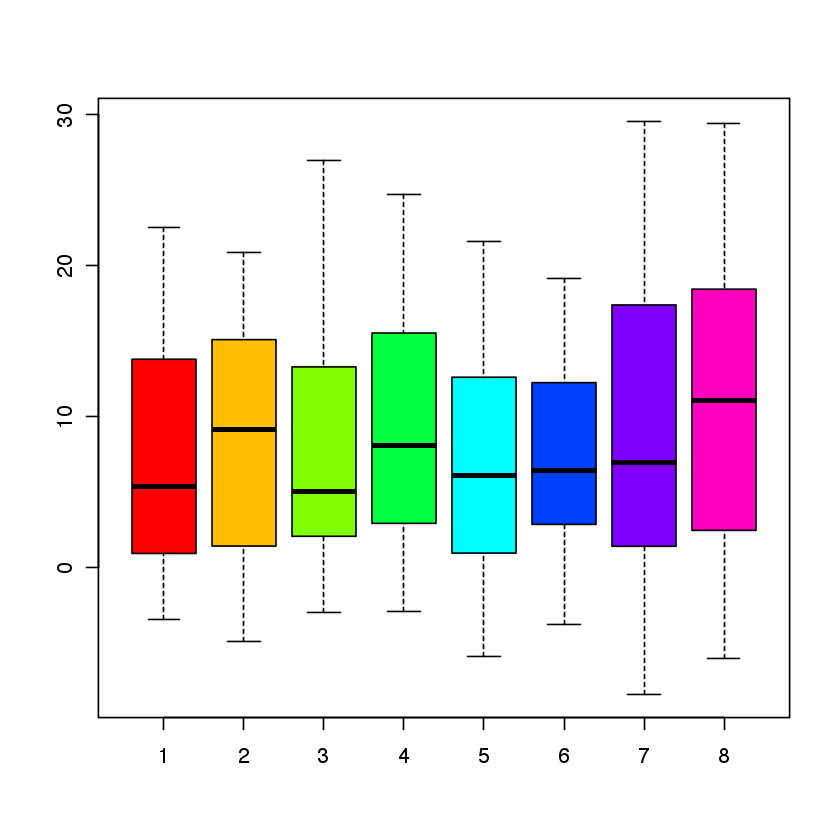

In [6]:
kmeans.res <- kmeans(y, center= 8)
kmeans.clusts <- list()
for(i in seq(8))
    kmeans.clusts[[i]] <- as.matrix(y[kmeans.res$cluster == i, ])

boxplot(kmeans.clusts, col= rainbow(length(kmeans.clusts)))

## Correlation between the responses (rows) and features (columns)

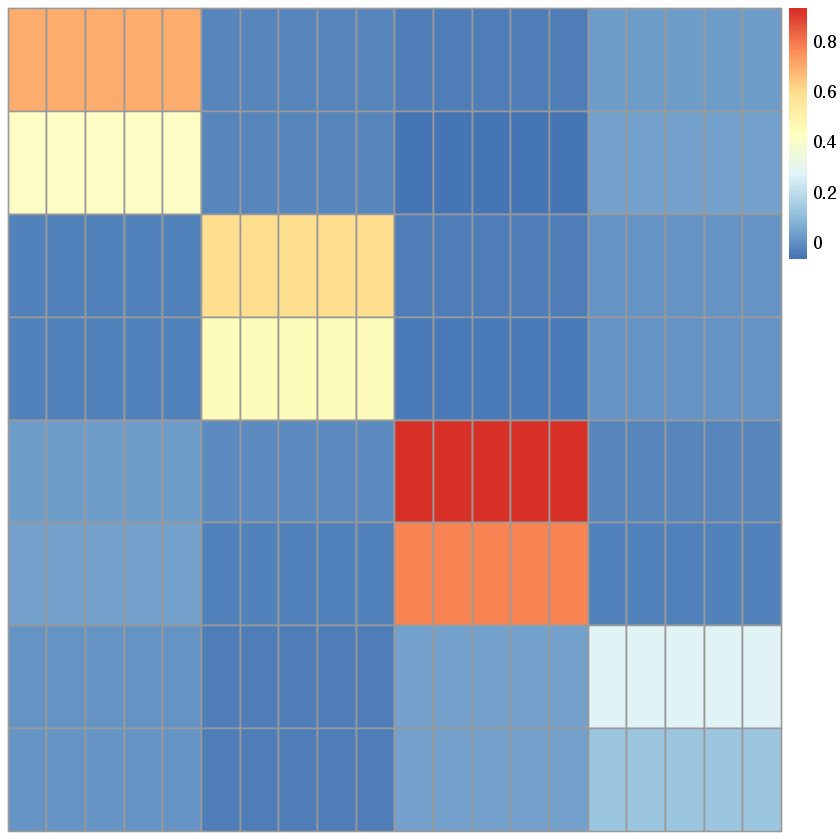

In [7]:
cors <- matrix(NA, nrow= ncol(y), ncol= ncol(x))
for(j in seq(ncol(y)))
    cors[j, ] <- sapply(seq(ncol(x)), function(i) cor(x[, i], y[, j]))
pheatmap(cors, cluster_cols = F, cluster_rows = F)

Load the TGGLasso model output based on the hirerachical tree structure approach for the current simulation

In [8]:
load(paste("~/G_MTL_sim/scMTL_HSMM_TGGLasso_hc_sim", sim, "_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc <- get.prediction.acc(partition, TGL.model.sim.rand)


Load the TGGLasso model output based on the random tree with the hirerachical tree topology for the current simulation

In [9]:
load(paste("scMTL_HSMM_TGGLasso_random_hc_sim", sim,"_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc.rand <- get.prediction.acc(partition, TGL.model.sim.rand)

## Performance visualization

### Pearson correlation

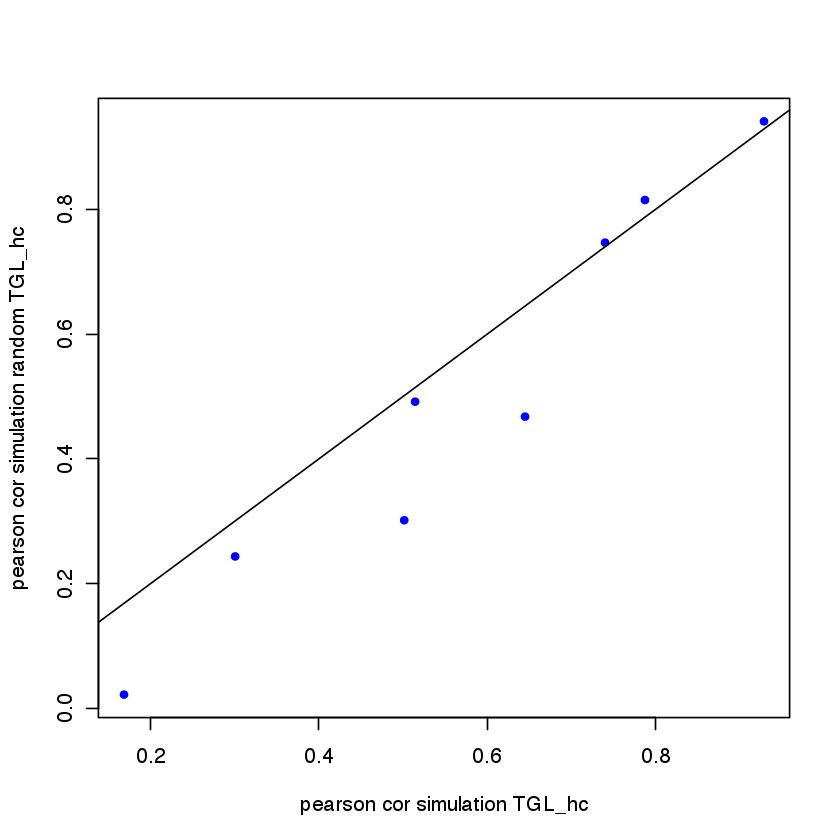

In [10]:
plot(sim.hc$test.cors.p, sim.hc.rand$test.cors.p, pch= 20, col= "blue", xlab= "pearson cor simulation TGL_hc", ylab= "pearson cor simulation random TGL_hc")
abline(a= 0, b= 1) ## Add a diagonal line

### Spearman correlation

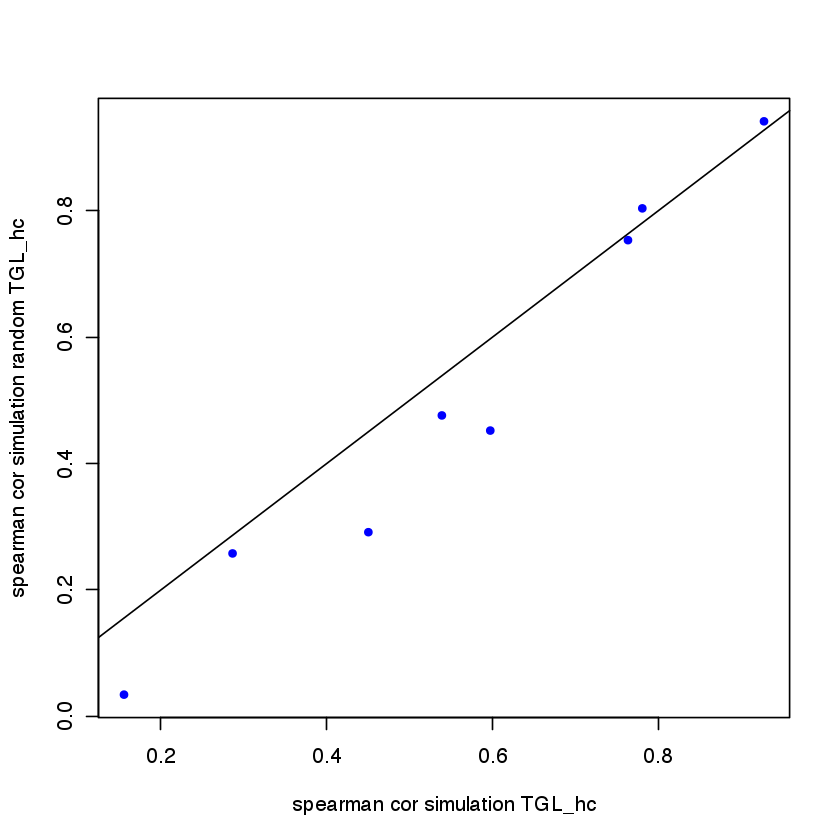

In [11]:
plot(sim.hc$test.cors.s, sim.hc.rand$test.cors.s, pch= 20, col= "blue", xlab= "spearman cor simulation TGL_hc", ylab= "spearman cor simulation random TGL_hc")
abline(a= 0, b= 1)

# Simulation #2 <a class="anchor" id="sim2"></a>

In [12]:
sim <- 2

## Data Visualization

In [13]:
x <- read.table(paste("~/G_MTL_sim/sim", sim, "_features.txt", sep= ""))
y <- read.table(paste("~/G_MTL_sim/sim", sim, "_responses.txt", sep= ""))
print(dim(x))
print(dim(y))

[1] 400  20
[1] 400   8


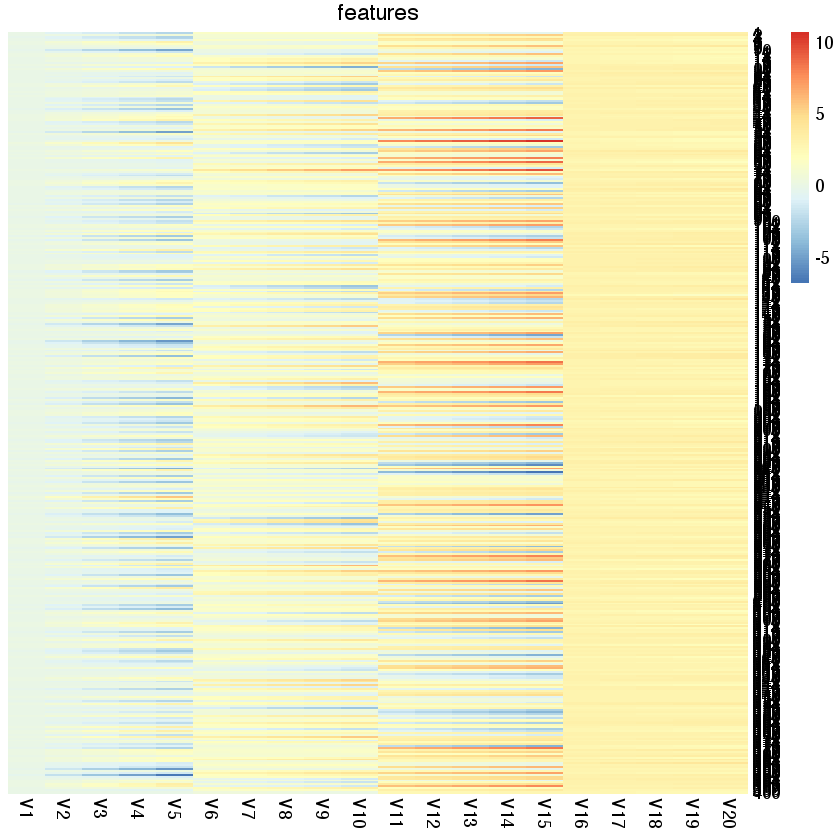

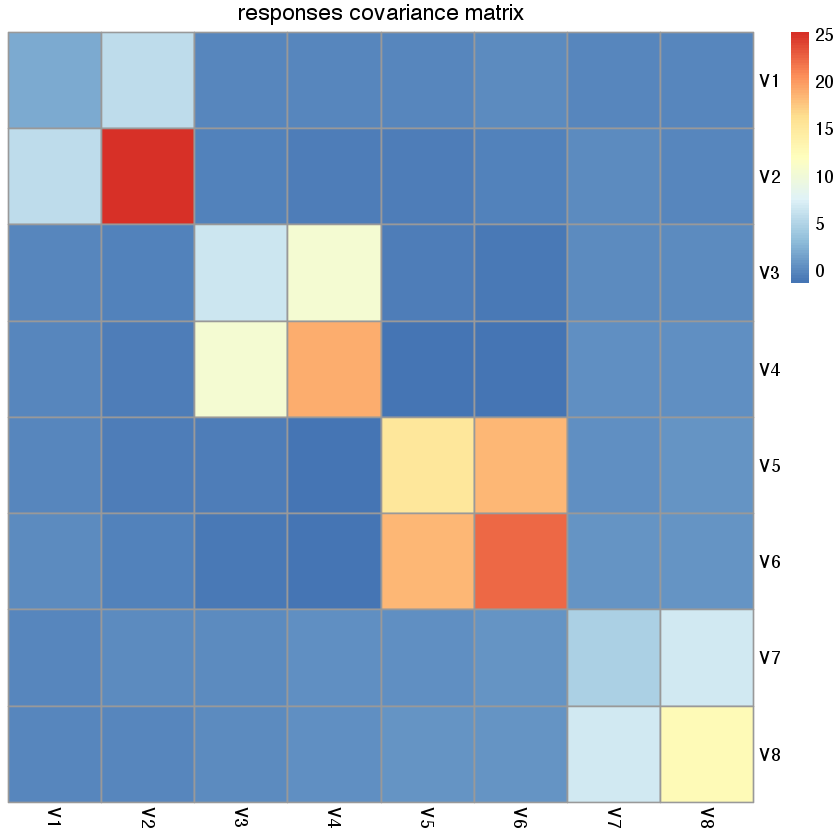

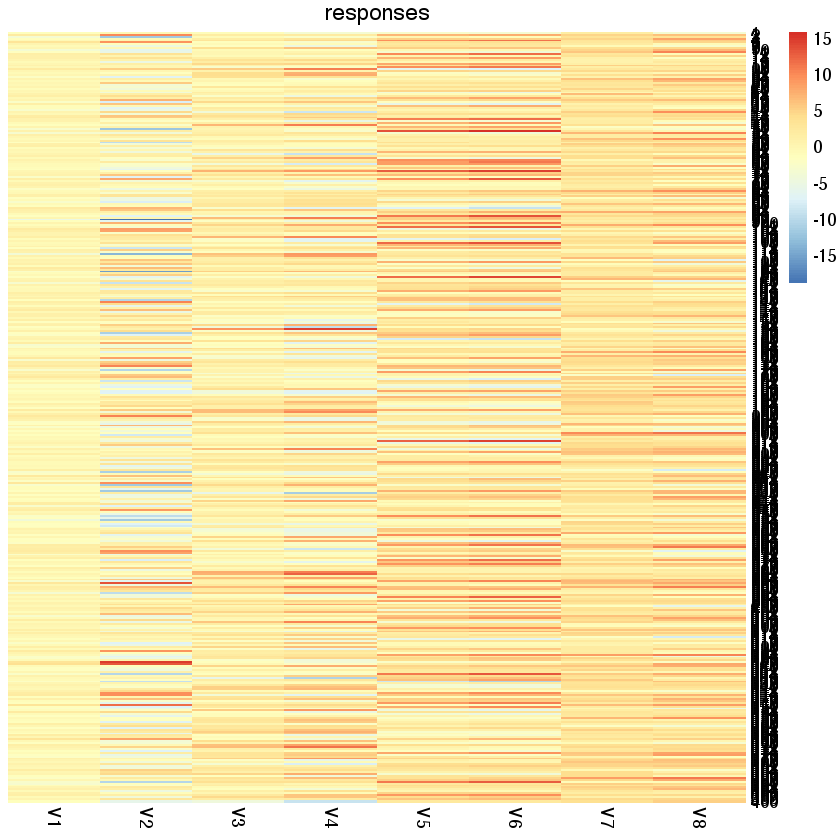

In [14]:
y.cov <- cov(y)
library(pheatmap)
pheatmap(x, cluster_rows= F, cluster_cols= F, main= "features")
pheatmap(y.cov, cluster_rows= F, cluster_cols= F, main= "responses covariance matrix")
pheatmap(y, cluster_rows= F, cluster_cols= F, main= "responses")

## Plot the kmeans clusterin of the responses to inspect how much they overlap

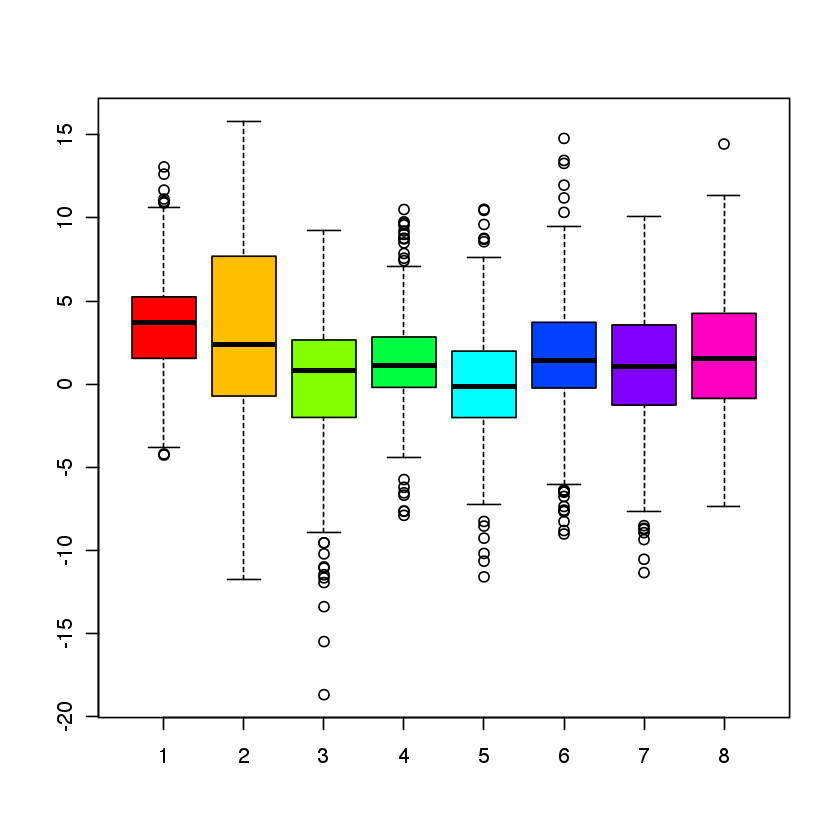

In [15]:
kmeans.res <- kmeans(y, center= 8)
kmeans.clusts <- list()
for(i in seq(8))
    kmeans.clusts[[i]] <- as.matrix(y[kmeans.res$cluster == i, ])
boxplot(kmeans.clusts, col= rainbow(length(kmeans.clusts)))

## Correlation between the responses (rows) and features (columns)

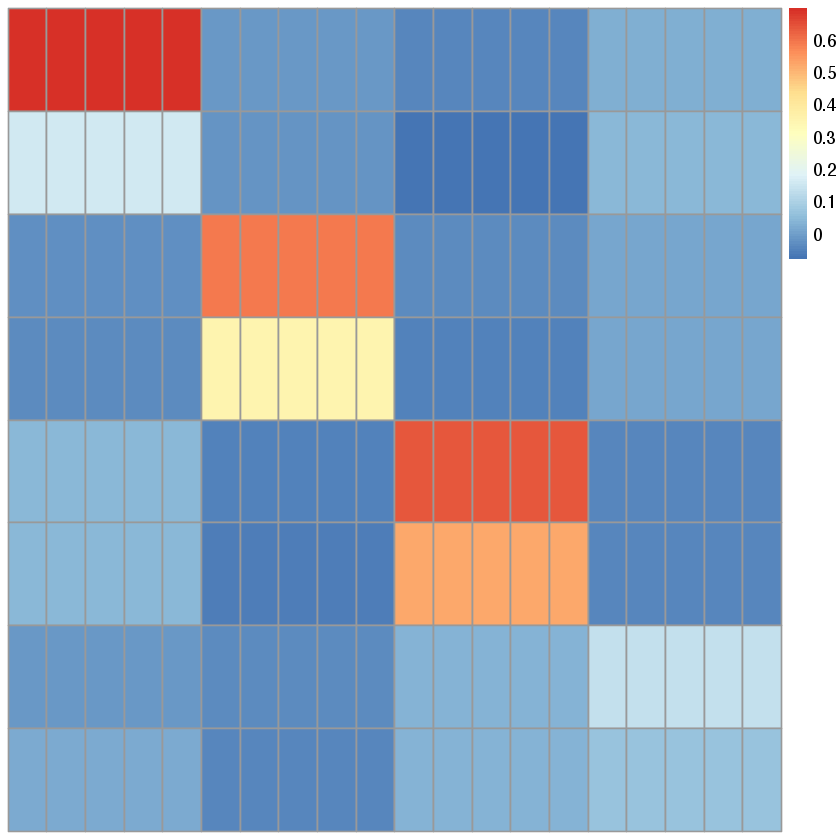

In [16]:
cors <- matrix(NA, nrow= ncol(y), ncol= ncol(x))
for(j in seq(ncol(y)))
    cors[j, ] <- sapply(seq(ncol(x)), function(i) cor(x[, i], y[, j]))
pheatmap(cors, cluster_cols = F, cluster_rows = F)

Load the TGGLasso model output based on the hirerachical tree structure approach for the current simulation

In [17]:
load(paste("~/G_MTL_sim/scMTL_HSMM_TGGLasso_hc_sim", sim, "_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc <- get.prediction.acc(partition, TGL.model.sim.rand)

Load the TGGLasso model output based on the random tree with the hirerachical tree topology for the current simulation

In [18]:
load(paste("scMTL_HSMM_TGGLasso_random_hc_sim", sim,"_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc.rand <- get.prediction.acc(partition, TGL.model.sim.rand)

## Performance visualization

### Pearson correlation

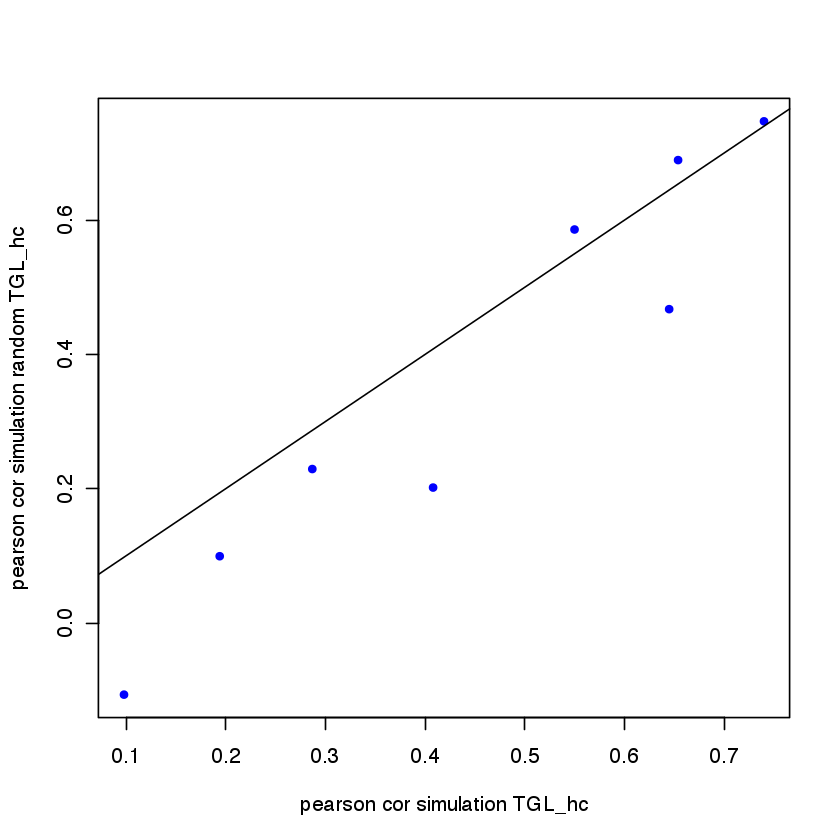

In [19]:
plot(sim.hc$test.cors.p, sim.hc.rand$test.cors.p, pch= 20, col= "blue", xlab= "pearson cor simulation TGL_hc", ylab= "pearson cor simulation random TGL_hc")
abline(a= 0, b= 1) ## Add a diagonal line

### Spearman correlation

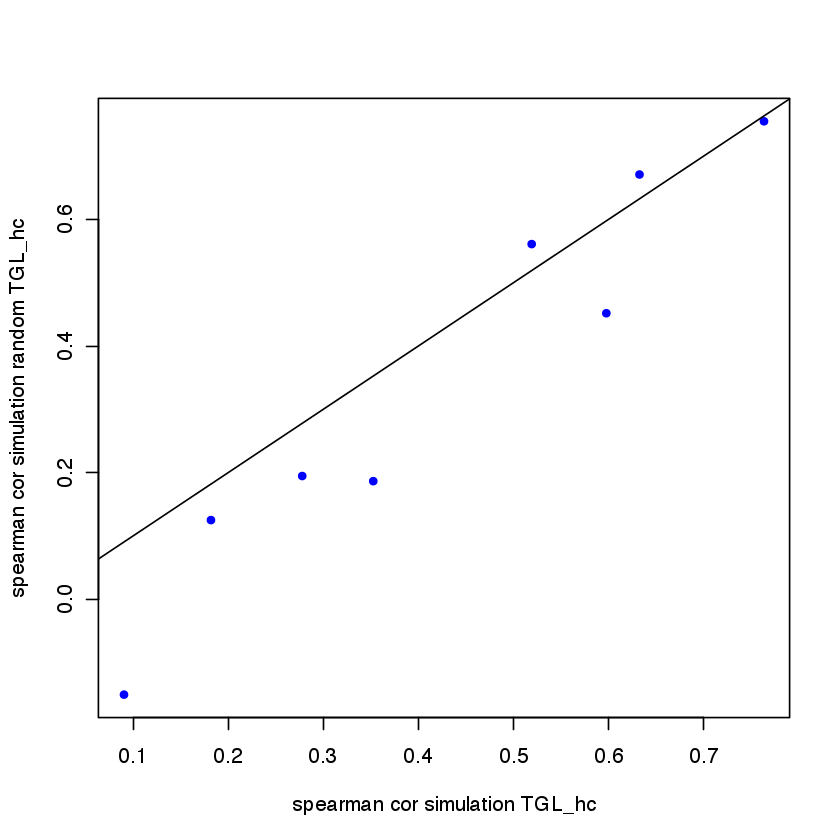

In [20]:
plot(sim.hc$test.cors.s, sim.hc.rand$test.cors.s, pch= 20, col= "blue", xlab= "spearman cor simulation TGL_hc", ylab= "spearman cor simulation random TGL_hc")
abline(a= 0, b= 1)

# Simulation #3 <a class="anchor" id="sim3"></a>

In [21]:
sim <- 3

## Data Visualization

In [22]:
x <- read.table(paste("~/G_MTL_sim/sim", sim, "_features.txt", sep= ""))
y <- read.table(paste("~/G_MTL_sim/sim", sim, "_responses.txt", sep= ""))
print(dim(x))
print(dim(y))

[1] 400  15
[1] 400   6


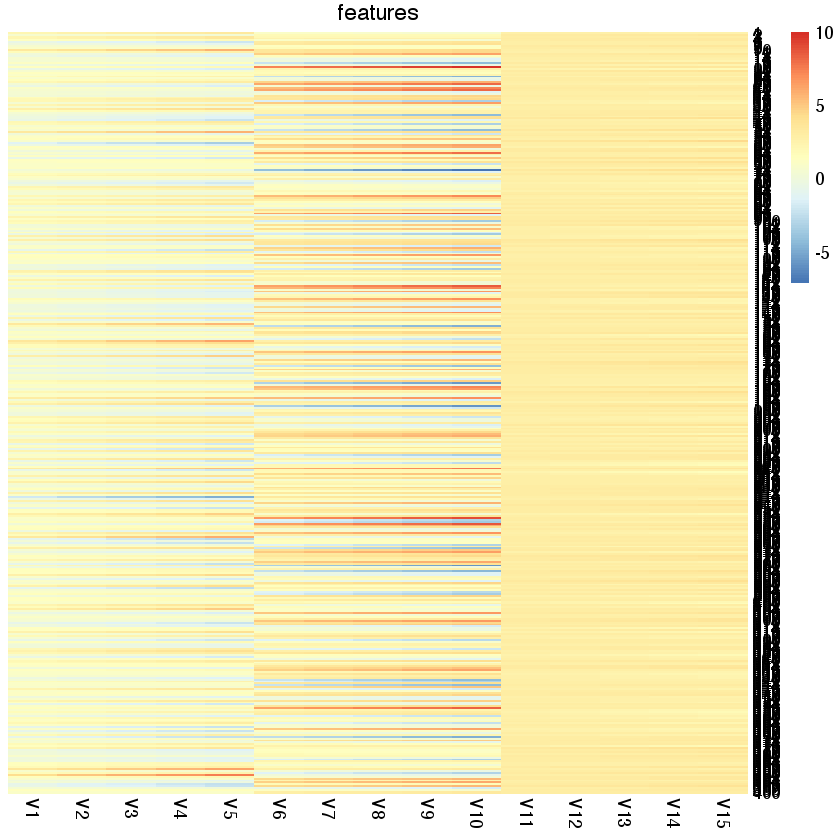

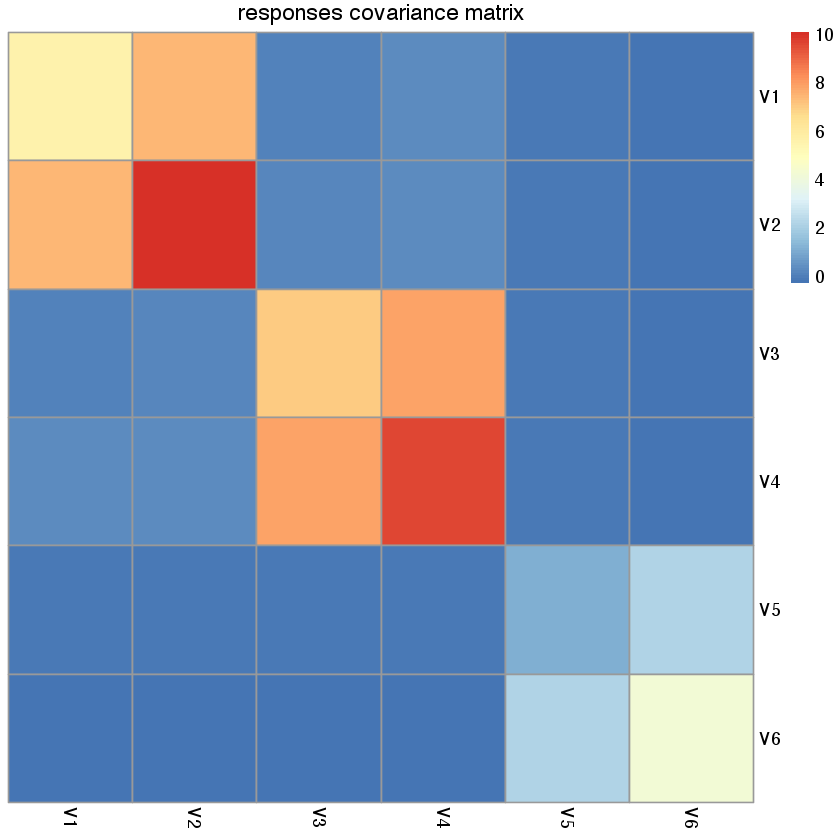

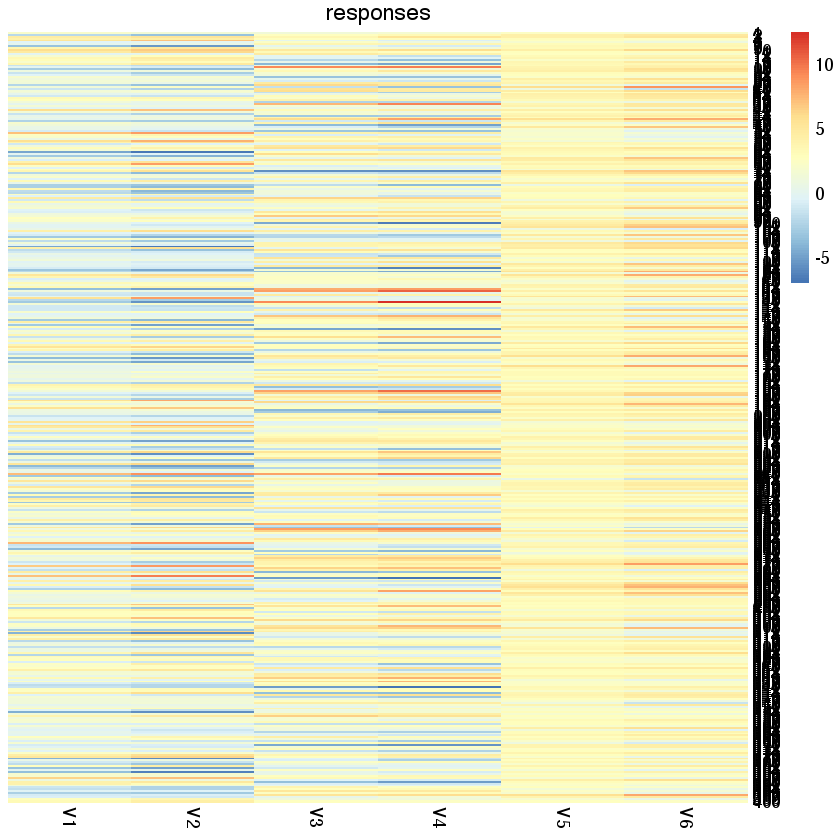

In [23]:
y.cov <- cov(y)
library(pheatmap)
pheatmap(x, cluster_rows= F, cluster_cols= F, main= "features")
pheatmap(y.cov, cluster_rows= F, cluster_cols= F, main= "responses covariance matrix")

pheatmap(y, cluster_rows= F, cluster_cols= F, main= "responses")

## Plot the kmeans clusterin of the responses to inspect how much they overlap

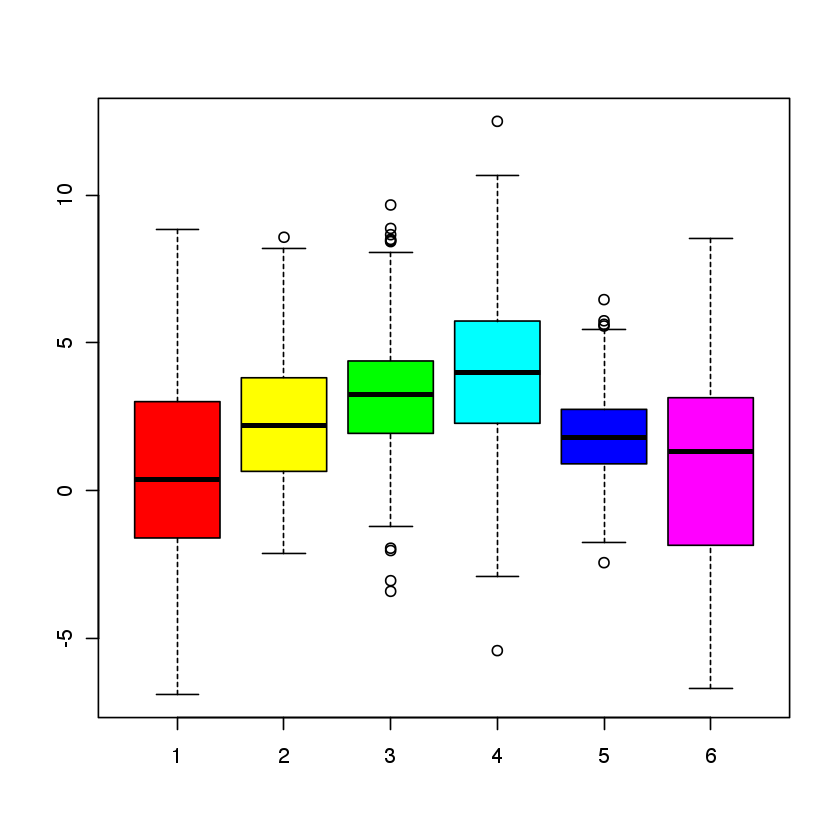

In [24]:
kmeans.res <- kmeans(y, center= 6)
kmeans.clusts <- list()
for(i in seq(6))
    kmeans.clusts[[i]] <- as.matrix(y[kmeans.res$cluster == i, ])
boxplot(kmeans.clusts, col= rainbow(length(kmeans.clusts)))

## Correlation between the responses (rows) and features (columns)

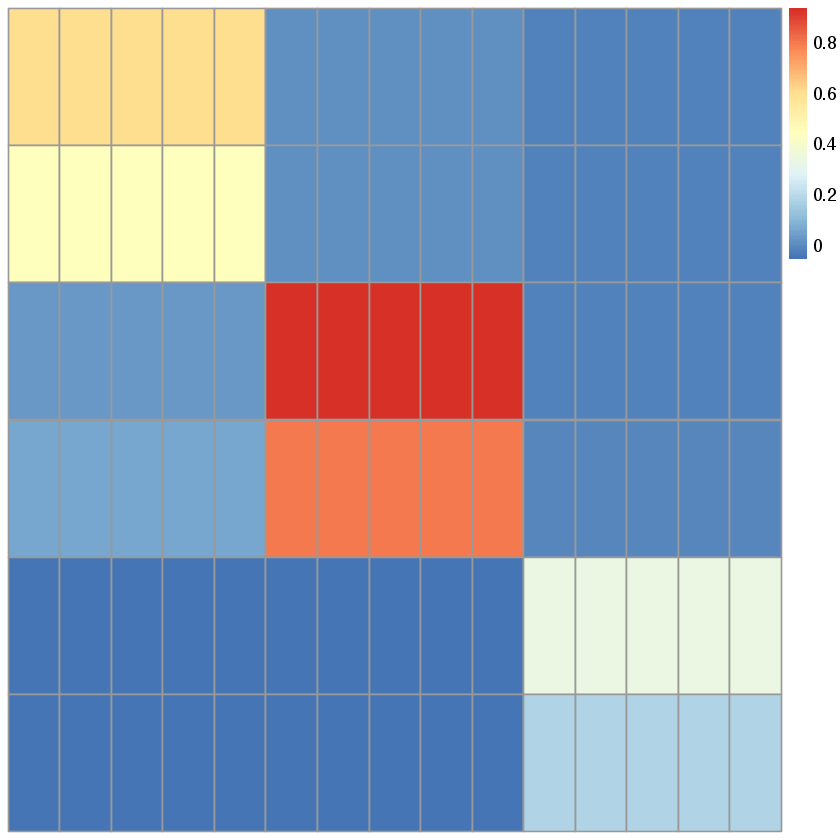

In [25]:
cors <- matrix(NA, nrow= ncol(y), ncol= ncol(x))
for(j in seq(ncol(y)))
    cors[j, ] <- sapply(seq(ncol(x)), function(i) cor(x[, i], y[, j]))
pheatmap(cors, cluster_cols = F, cluster_rows = F)

The correlation heatmap shows what features correlate best with the what responses. For example, the first five features (starting from the left of the heatmap) correlate better with the first two responses (Pearson correlation coefficient between 0.4 and 0.6). The second five features correlate best with third and fourth responses. And similarly for the last five features that best correlate to the last two responses.

Load the TGGLasso model output based on the hirerachical tree structure approach for the current simulation

In [26]:
load(paste("~/G_MTL_sim/scMTL_HSMM_TGGLasso_hc_sim", sim, "_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc <- get.prediction.acc(partition, TGL.model.sim.rand)

Load the TGGLasso model output based on the random tree with the hirerachical tree topology for the current simulation

In [27]:
load(paste("scMTL_HSMM_TGGLasso_random_hc_sim", sim,"_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc.rand <- get.prediction.acc(partition, TGL.model.sim.rand)

## Performance visualization

### Pearson correlation

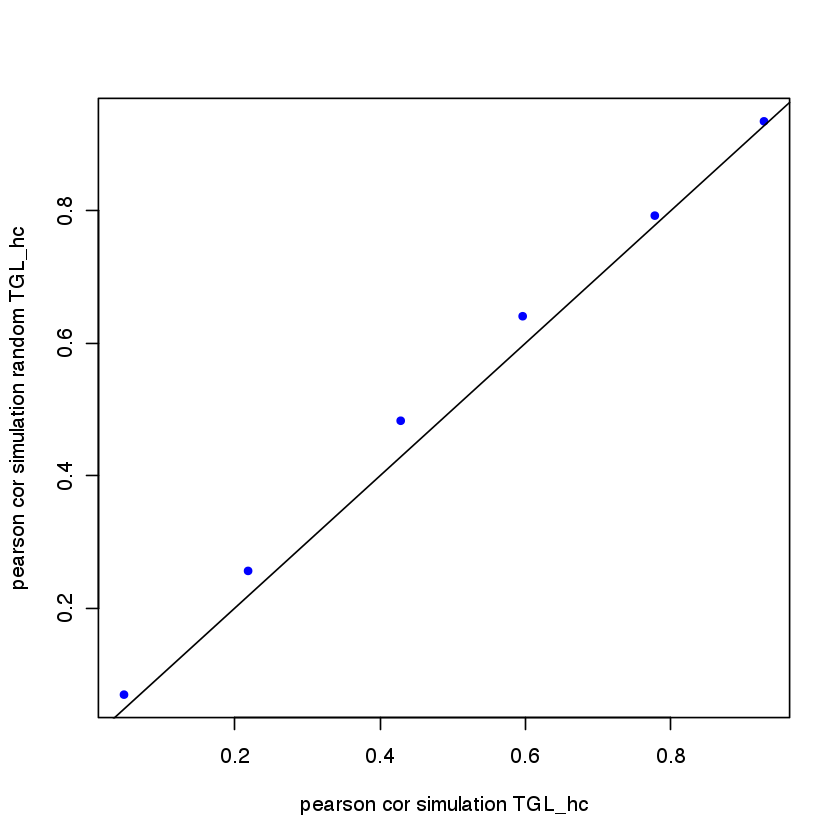

In [28]:
plot(sim.hc$test.cors.p, sim.hc.rand$test.cors.p, pch= 20, col= "blue", xlab= "pearson cor simulation TGL_hc", ylab= "pearson cor simulation random TGL_hc")
abline(a= 0, b= 1) ## Add a diagonal line

### Spearman correlation

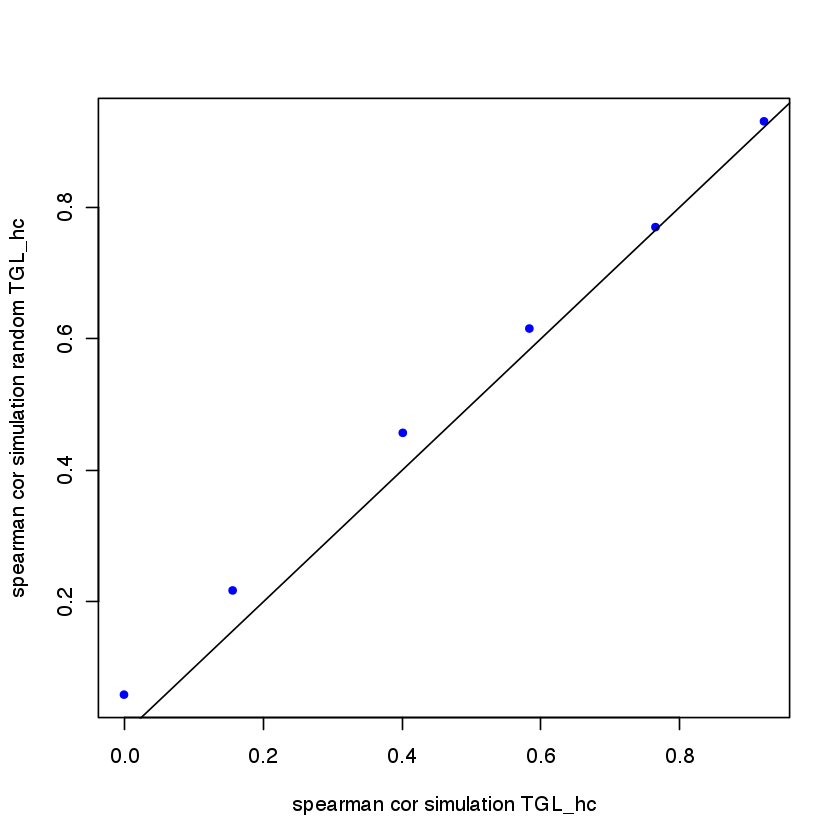

In [29]:
plot(sim.hc$test.cors.s, sim.hc.rand$test.cors.s, pch= 20, col= "blue", xlab= "spearman cor simulation TGL_hc", ylab= "spearman cor simulation random TGL_hc")
abline(a= 0, b= 1)

# Simulation #4 <a class="anchor" id="sim4"></a>

* Number of data points (samples, rows) is increased from 400 to 2000

In [30]:
sim <- 4

## Data Visualization

In [31]:
x <- read.table(paste("~/G_MTL_sim/sim", sim, "_features.txt", sep= ""))
y <- read.table(paste("~/G_MTL_sim/sim", sim, "_responses.txt", sep= ""))
print(dim(x))
print(dim(y))

[1] 2000   15
[1] 2000    6


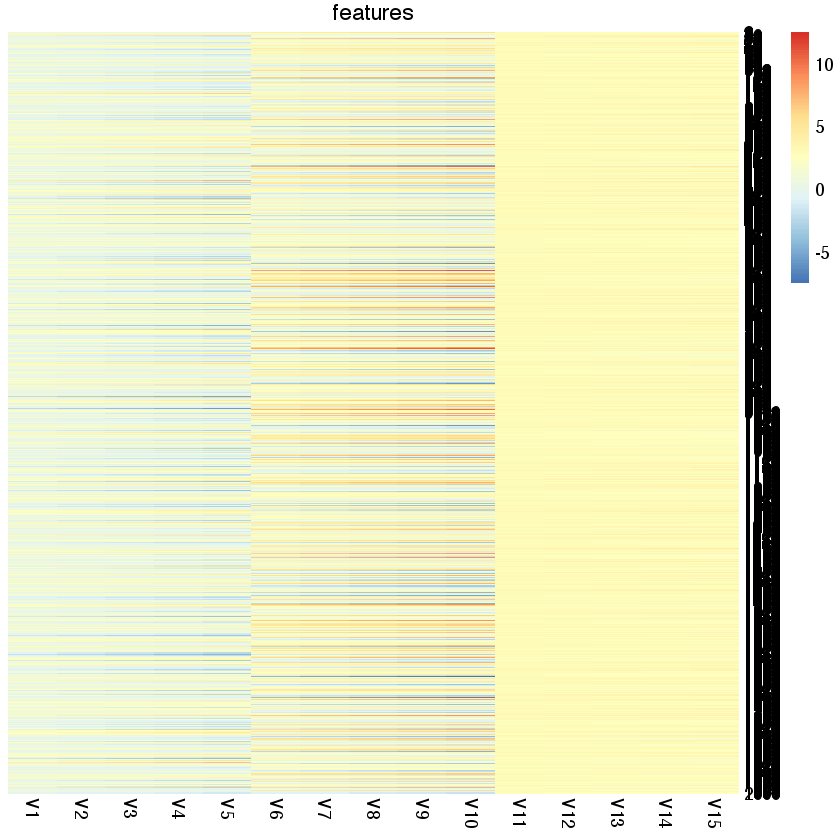

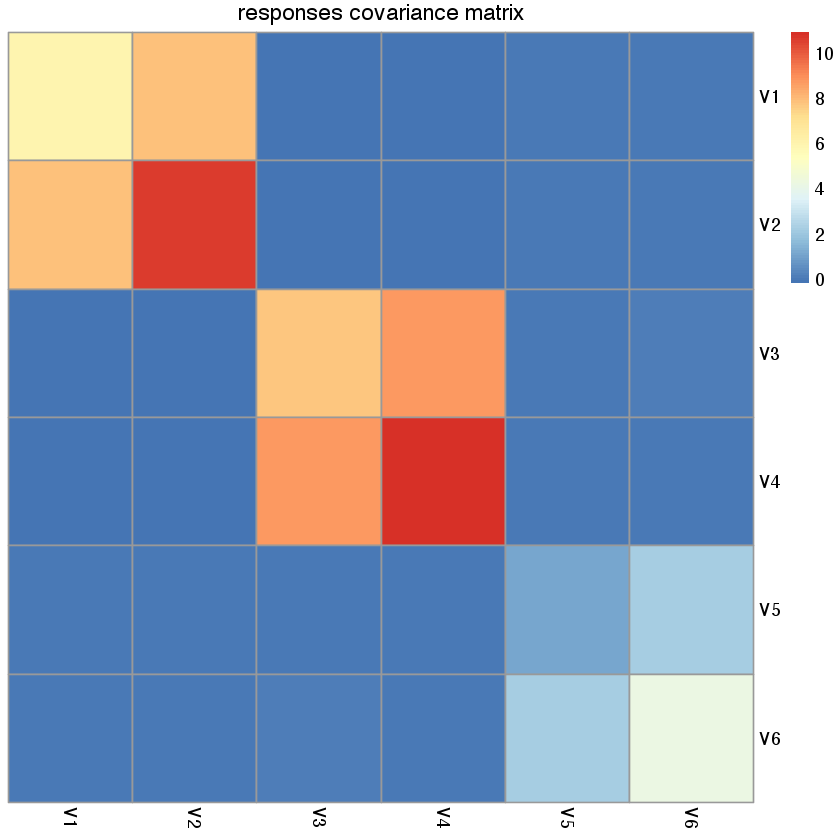

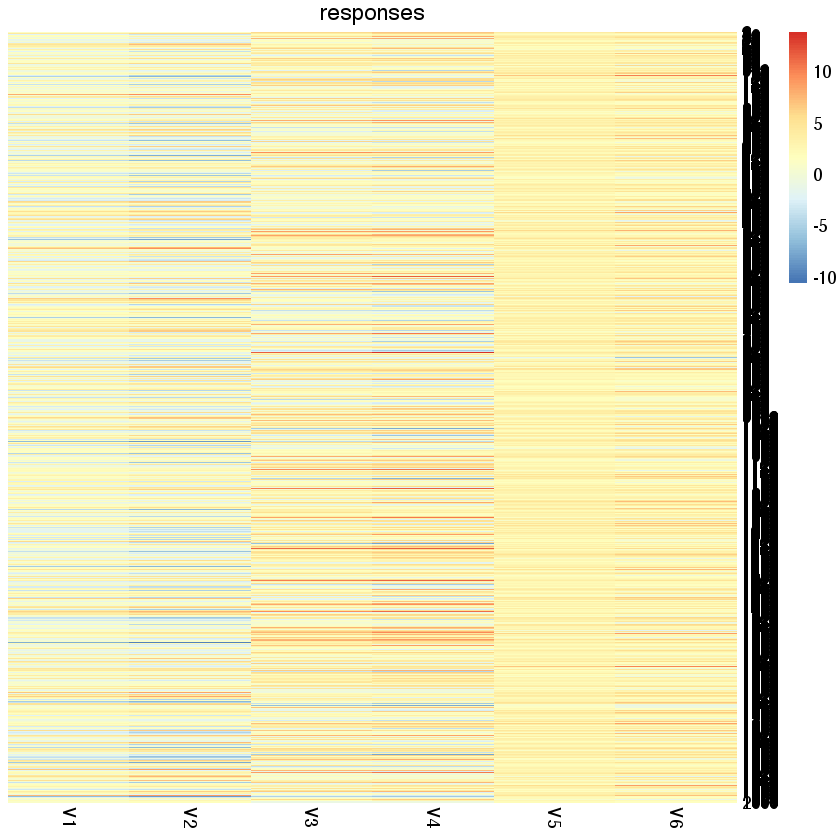

In [32]:
y.cov <- cov(y)
library(pheatmap)
pheatmap(x, cluster_rows= F, cluster_cols= F, main= "features")
pheatmap(y.cov, cluster_rows= F, cluster_cols= F, main= "responses covariance matrix")
pheatmap(y, cluster_rows= F, cluster_cols= F, main= "responses")

## Plot the kmeans clusterin of the responses to inspect how much they overlap

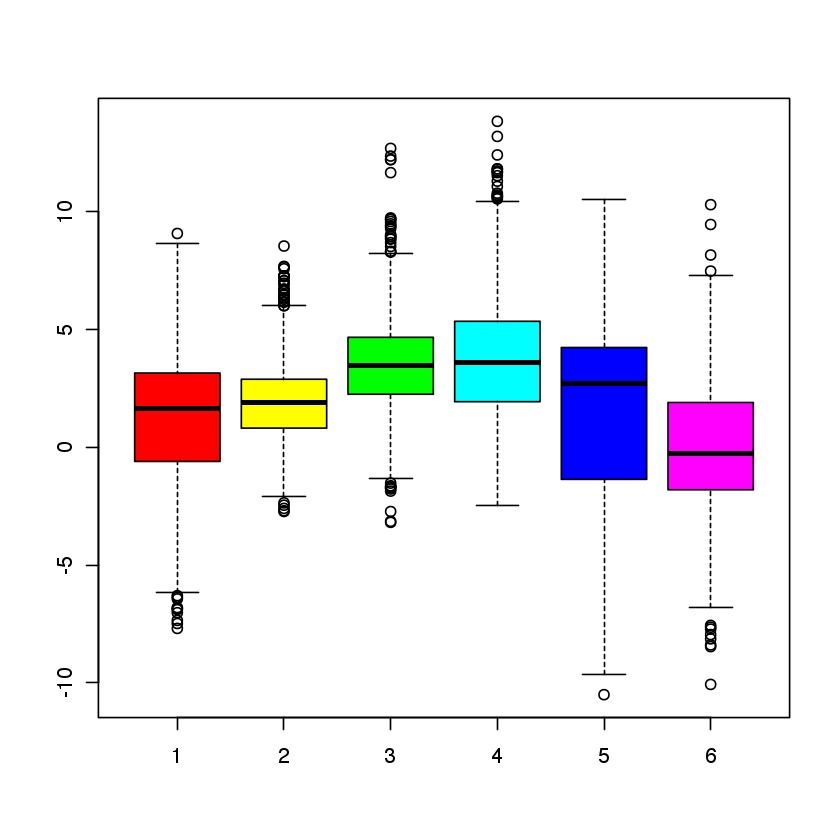

In [33]:
kmeans.res <- kmeans(y, center= 6)
kmeans.clusts <- list()
for(i in seq(6))
    kmeans.clusts[[i]] <- as.matrix(y[kmeans.res$cluster == i, ])

boxplot(kmeans.clusts, col= rainbow(length(kmeans.clusts)))

## Correlation between the responses (rows) and features (columns)

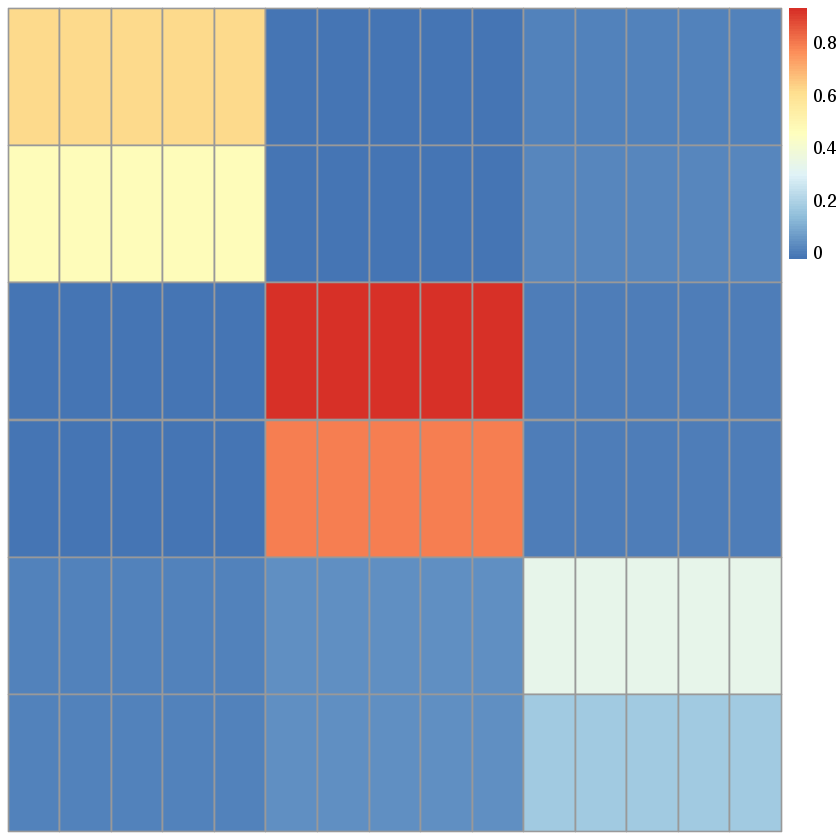

In [34]:
cors <- matrix(NA, nrow= ncol(y), ncol= ncol(x))
for(j in seq(ncol(y)))
    cors[j, ] <- sapply(seq(ncol(x)), function(i) cor(x[, i], y[, j]))
pheatmap(cors, cluster_cols = F, cluster_rows = F)

Load the TGGLasso model output based on the hirerachical tree structure approach for the current simulation

In [35]:
load(paste("~/G_MTL_sim/scMTL_HSMM_TGGLasso_hc_sim", sim, "_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc <- get.prediction.acc(partition, TGL.model.sim.rand)


Load the TGGLasso model output based on the random tree with the hirerachical tree topology for the current simulation

In [36]:
load(paste("scMTL_HSMM_TGGLasso_random_hc_sim", sim,"_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc.rand <- get.prediction.acc(partition, TGL.model.sim.rand)

## Performance visualization

### Pearson correlation

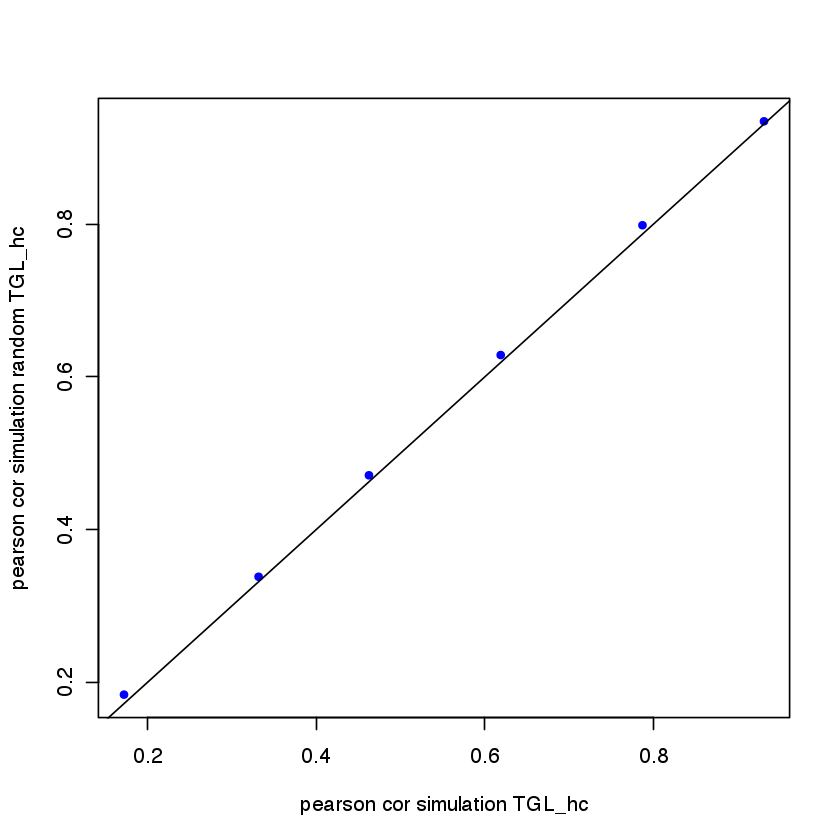

In [37]:
plot(sim.hc$test.cors.p, sim.hc.rand$test.cors.p, pch= 20, col= "blue", xlab= "pearson cor simulation TGL_hc", ylab= "pearson cor simulation random TGL_hc")
abline(a= 0, b= 1) ## Add a diagonal line

### Spearman correlation

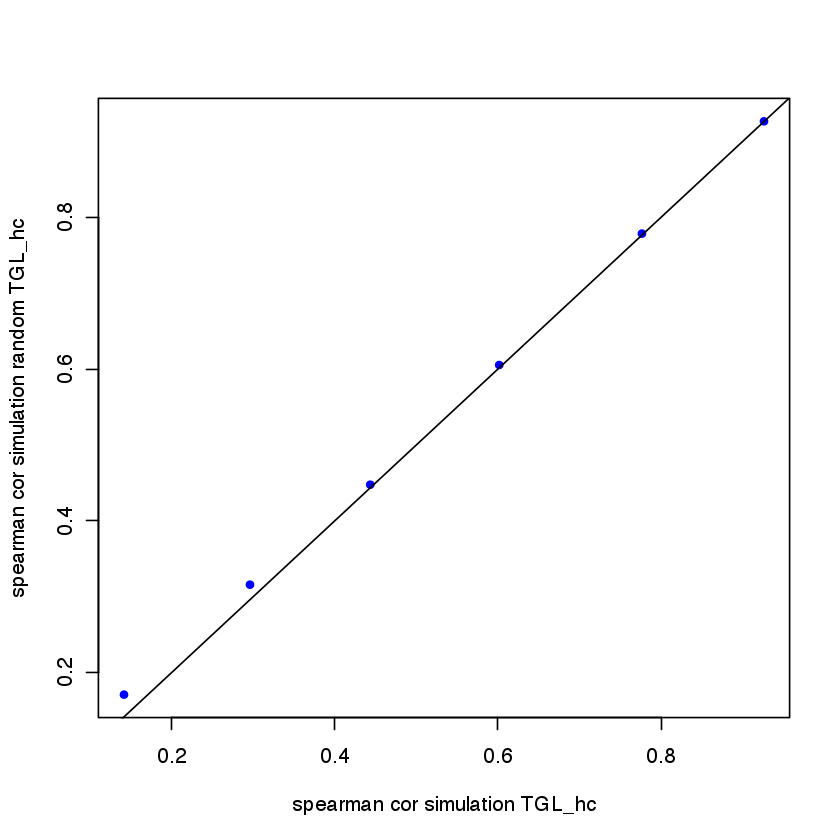

In [38]:
plot(sim.hc$test.cors.s, sim.hc.rand$test.cors.s, pch= 20, col= "blue", xlab= "spearman cor simulation TGL_hc", ylab= "spearman cor simulation random TGL_hc")
abline(a= 0, b= 1)

# Simulation #5 <a class="anchor" id="sim5"></a>

* Increased the covariance matrix corresponding to the additive noise in generating the response variable.

In [39]:
sim <- 5

## Data Visualization

In [40]:
x <- read.table(paste("~/G_MTL_sim/sim", sim, "_features.txt", sep= ""))
y <- read.table(paste("~/G_MTL_sim/sim", sim, "_responses.txt", sep= ""))
print(dim(x))
print(dim(y))

[1] 2000   15
[1] 2000    6


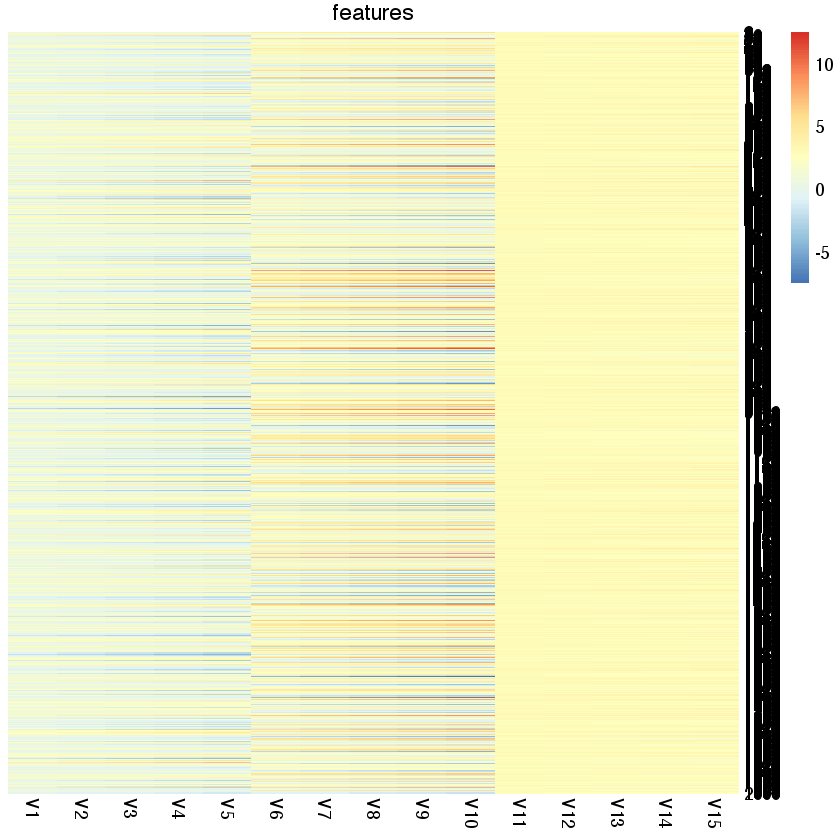

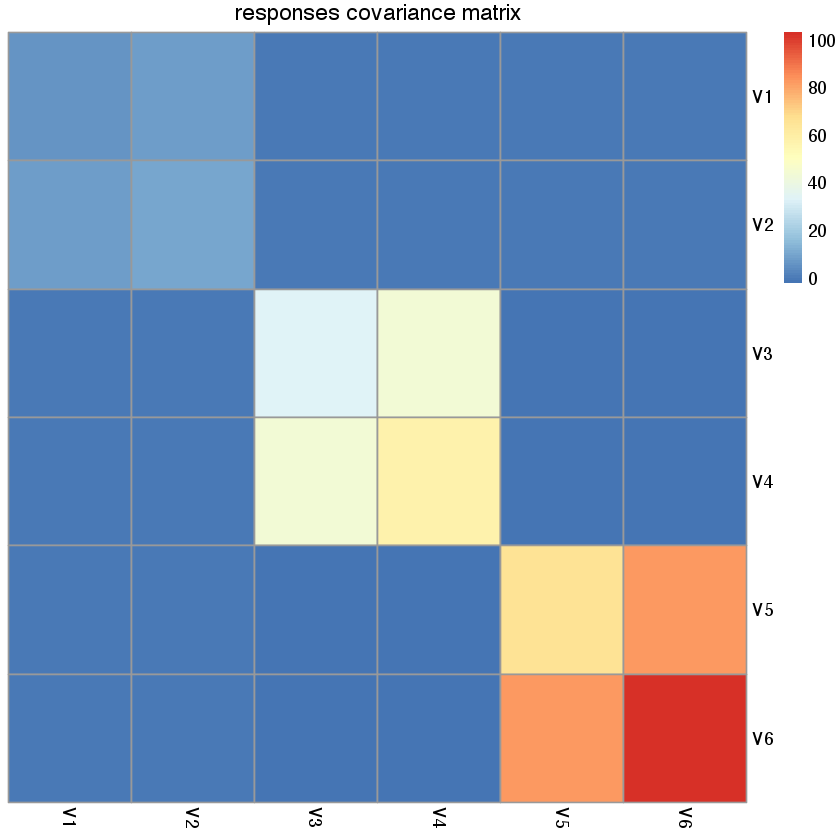

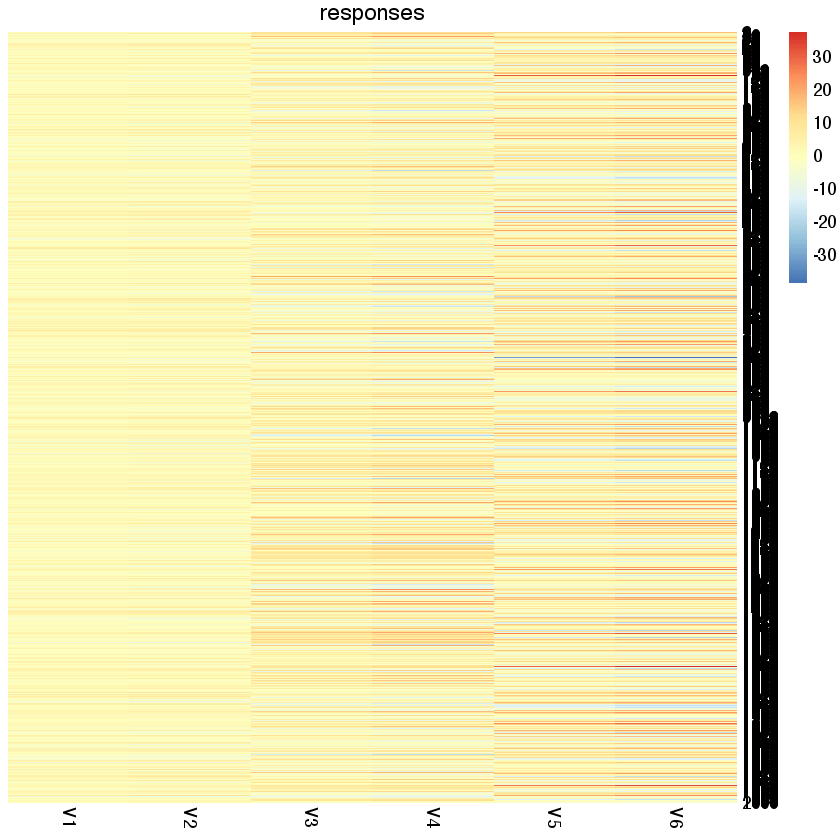

In [41]:
y.cov <- cov(y)
library(pheatmap)
pheatmap(x, cluster_rows= F, cluster_cols= F, main= "features")
pheatmap(y.cov, cluster_rows= F, cluster_cols= F, main= "responses covariance matrix")
pheatmap(y, cluster_rows= F, cluster_cols= F, main= "responses")

## Plot the kmeans clusterin of the responses to inspect how much they overlap

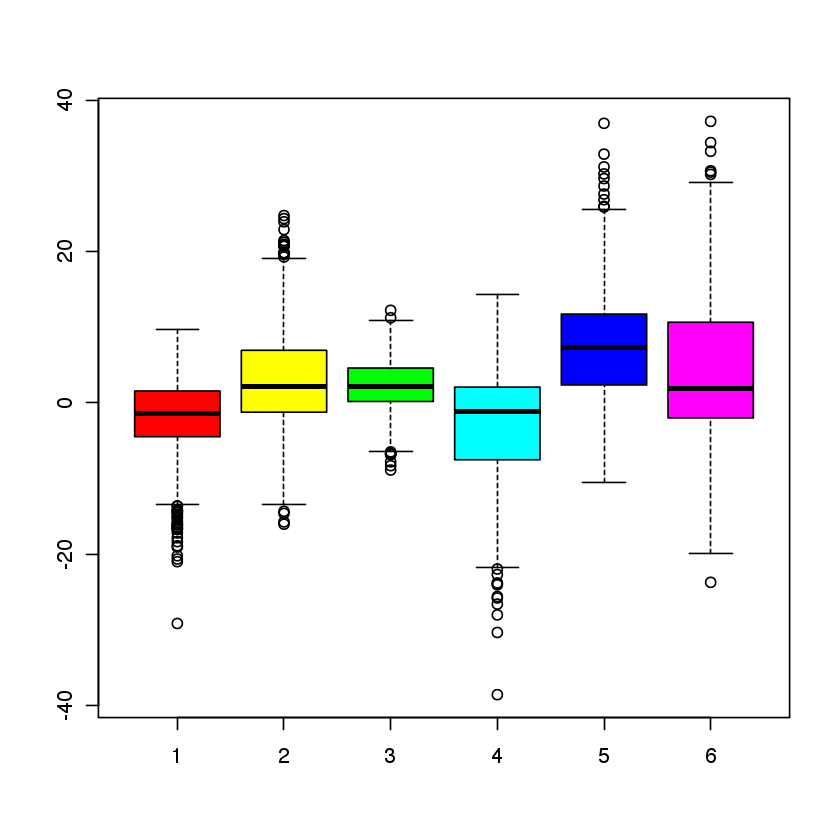

In [42]:
kmeans.res <- kmeans(y, center= 6)
kmeans.clusts <- list()
for(i in seq(6))
    kmeans.clusts[[i]] <- as.matrix(y[kmeans.res$cluster == i, ])

boxplot(kmeans.clusts, col= rainbow(length(kmeans.clusts)))

## Correlation between the responses (rows) and features (columns)

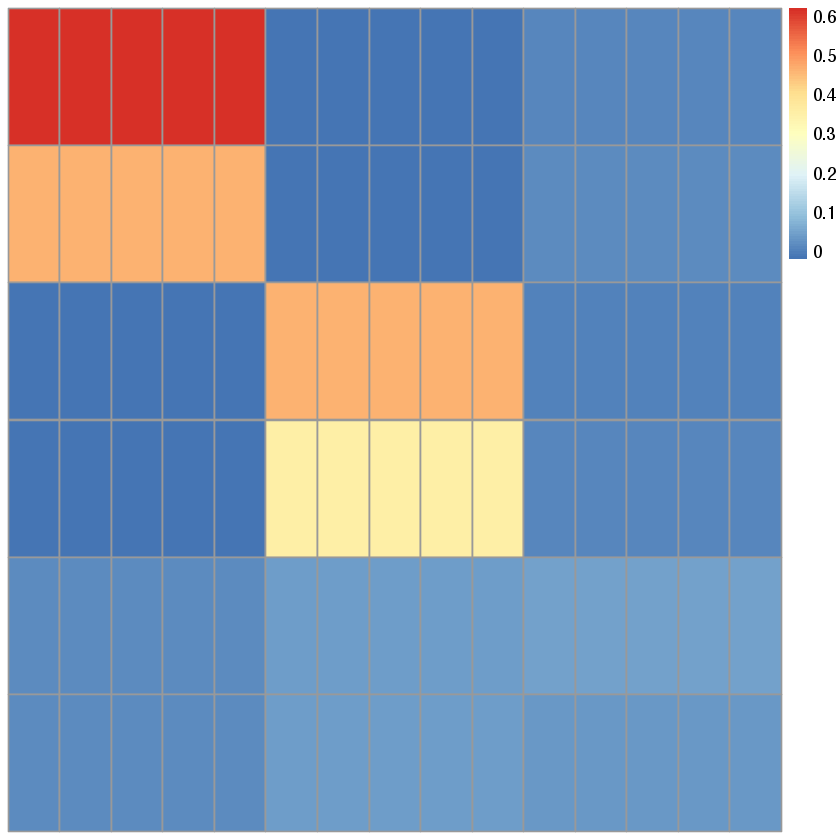

In [43]:
cors <- matrix(NA, nrow= ncol(y), ncol= ncol(x))
for(j in seq(ncol(y)))
    cors[j, ] <- sapply(seq(ncol(x)), function(i) cor(x[, i], y[, j]))
pheatmap(cors, cluster_cols = F, cluster_rows = F)

Load the TGGLasso model output based on the hirerachical tree structure approach for the current simulation

In [44]:
load(paste("~/G_MTL_sim/scMTL_HSMM_TGGLasso_hc_sim", sim, "_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc <- get.prediction.acc(partition, TGL.model.sim.rand)


Load the TGGLasso model output based on the random tree with the hirerachical tree topology for the current simulation

In [45]:
load(paste("scMTL_HSMM_TGGLasso_random_hc_sim", sim,"_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc.rand <- get.prediction.acc(partition, TGL.model.sim.rand)

## Performance visualization

### Pearson correlation

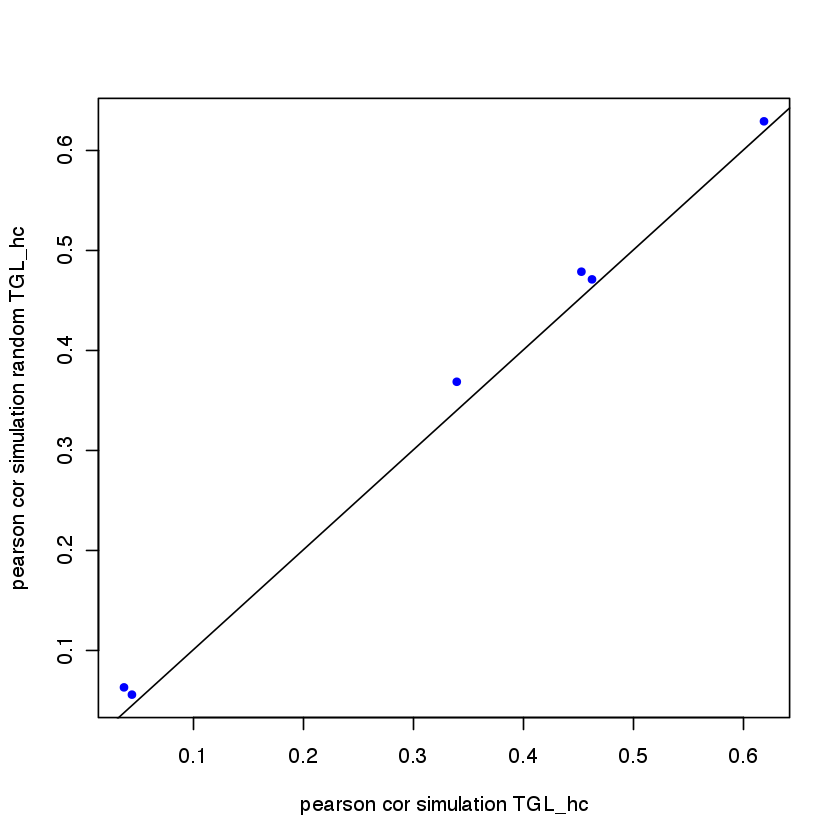

In [46]:
plot(sim.hc$test.cors.p, sim.hc.rand$test.cors.p, pch= 20, col= "blue", xlab= "pearson cor simulation TGL_hc", ylab= "pearson cor simulation random TGL_hc")
abline(a= 0, b= 1) ## Add a diagonal line

### Spearman correlation

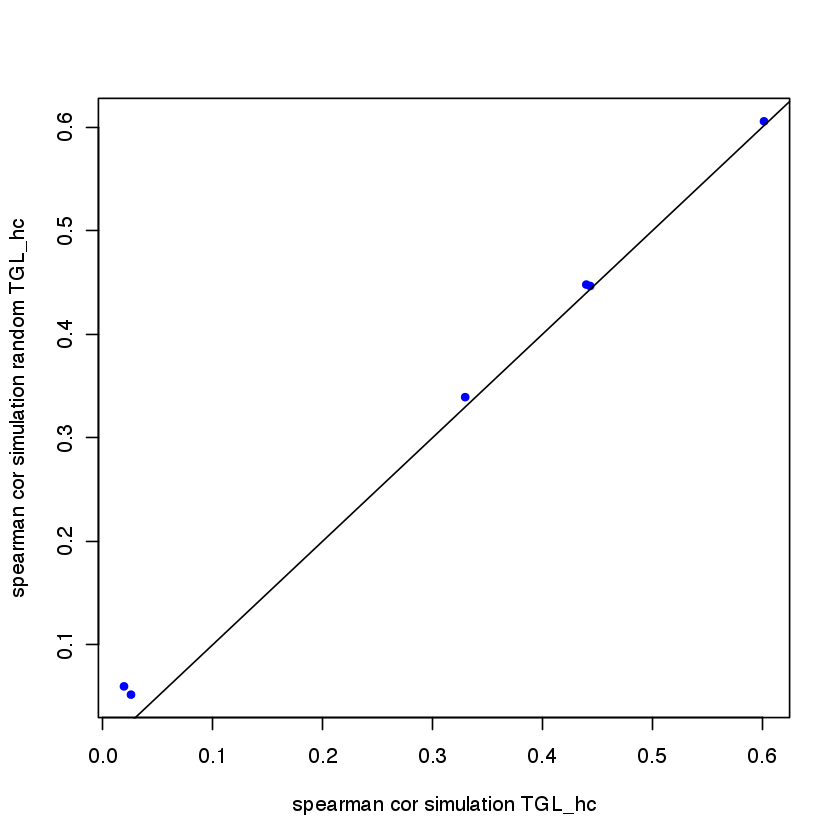

In [47]:
plot(sim.hc$test.cors.s, sim.hc.rand$test.cors.s, pch= 20, col= "blue", xlab= "spearman cor simulation TGL_hc", ylab= "spearman cor simulation random TGL_hc")
abline(a= 0, b= 1)

# Simulation #6 <a class="anchor" id="sim6"></a>

* The same as Simulation #5 but with 400 samples

In [48]:
sim <- 6

## Data Visualization

In [49]:
x <- read.table(paste("~/G_MTL_sim/sim", sim, "_features.txt", sep= ""))
y <- read.table(paste("~/G_MTL_sim/sim", sim, "_responses.txt", sep= ""))
print(dim(x))
print(dim(y))

[1] 400  15
[1] 400   6


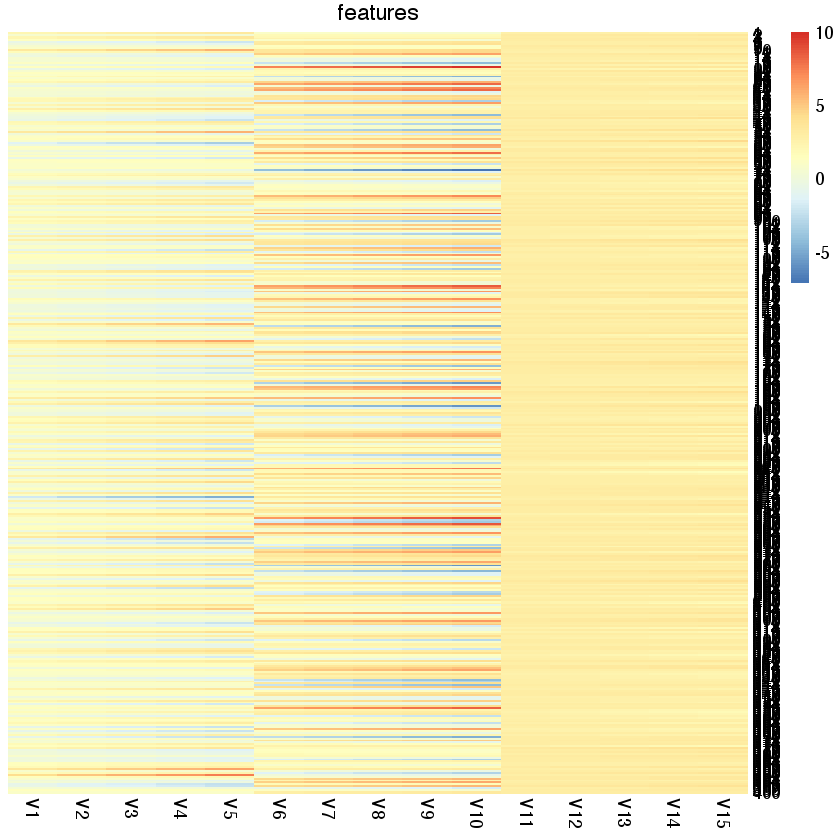

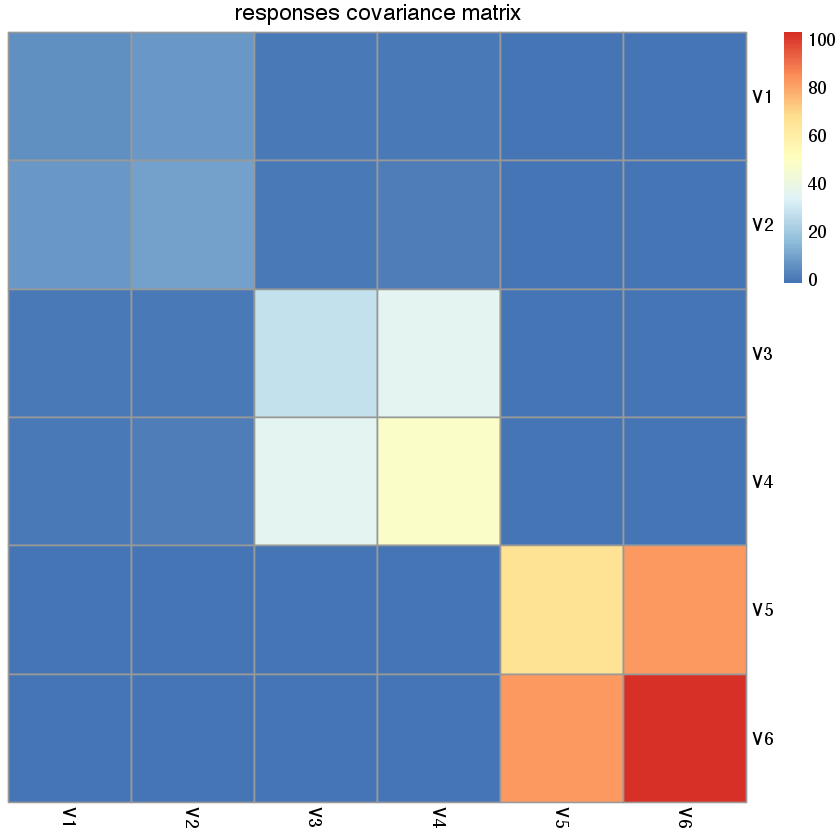

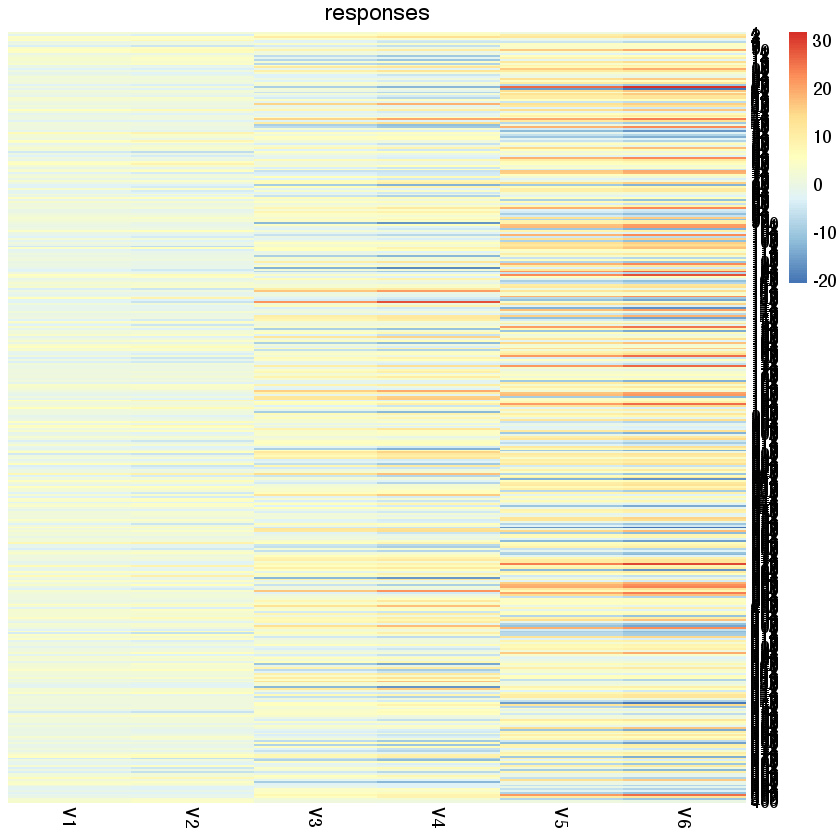

In [50]:
y.cov <- cov(y)
library(pheatmap)
pheatmap(x, cluster_rows= F, cluster_cols= F, main= "features")
pheatmap(y.cov, cluster_rows= F, cluster_cols= F, main= "responses covariance matrix")
pheatmap(y, cluster_rows= F, cluster_cols= F, main= "responses")

## Plot the kmeans clusterin of the responses to inspect how much they overlap

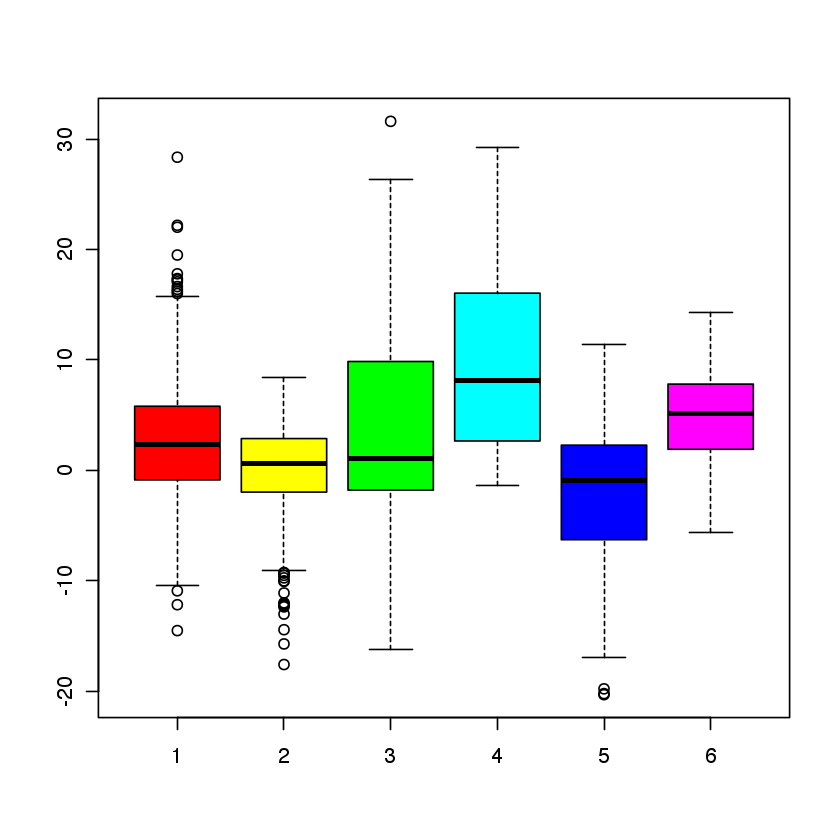

In [51]:
kmeans.res <- kmeans(y, center= 6)
kmeans.clusts <- list()
for(i in seq(6))
    kmeans.clusts[[i]] <- as.matrix(y[kmeans.res$cluster == i, ])

boxplot(kmeans.clusts, col= rainbow(length(kmeans.clusts)))

## Correlation between the responses (rows) and features (columns)

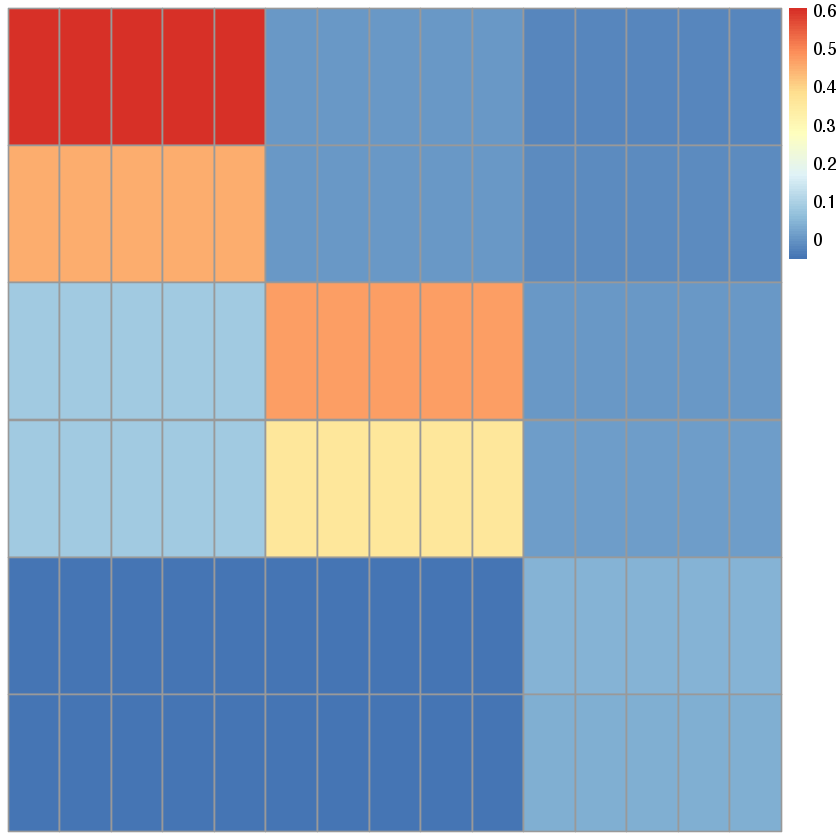

In [52]:
cors <- matrix(NA, nrow= ncol(y), ncol= ncol(x))
for(j in seq(ncol(y)))
    cors[j, ] <- sapply(seq(ncol(x)), function(i) cor(x[, i], y[, j]))
pheatmap(cors, cluster_cols = F, cluster_rows = F)

Load the TGGLasso model output based on the hirerachical tree structure approach for the current simulation

In [53]:
load(paste("~/G_MTL_sim/scMTL_HSMM_TGGLasso_hc_sim", sim, "_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc <- get.prediction.acc(partition, TGL.model.sim.rand)


Load the TGGLasso model output based on the random tree with the hirerachical tree topology for the current simulation

In [54]:
load(paste("scMTL_HSMM_TGGLasso_random_hc_sim", sim,"_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc.rand <- get.prediction.acc(partition, TGL.model.sim.rand)

## Performance visualization

### Pearson correlation

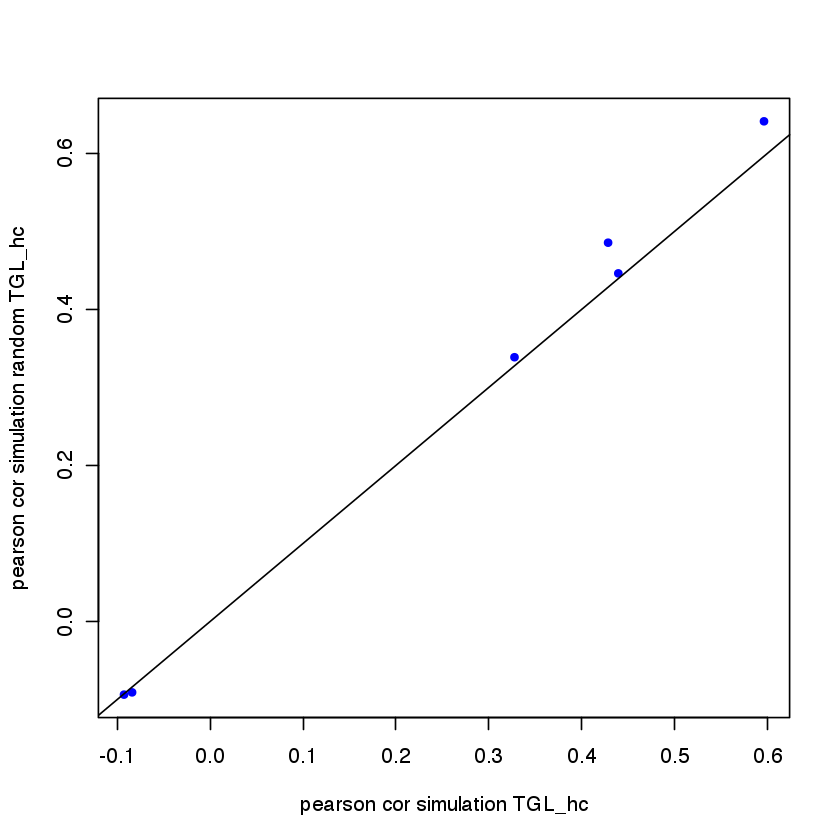

In [55]:
plot(sim.hc$test.cors.p, sim.hc.rand$test.cors.p, pch= 20, col= "blue", xlab= "pearson cor simulation TGL_hc", ylab= "pearson cor simulation random TGL_hc")
abline(a= 0, b= 1) ## Add a diagonal line

### Spearman correlation

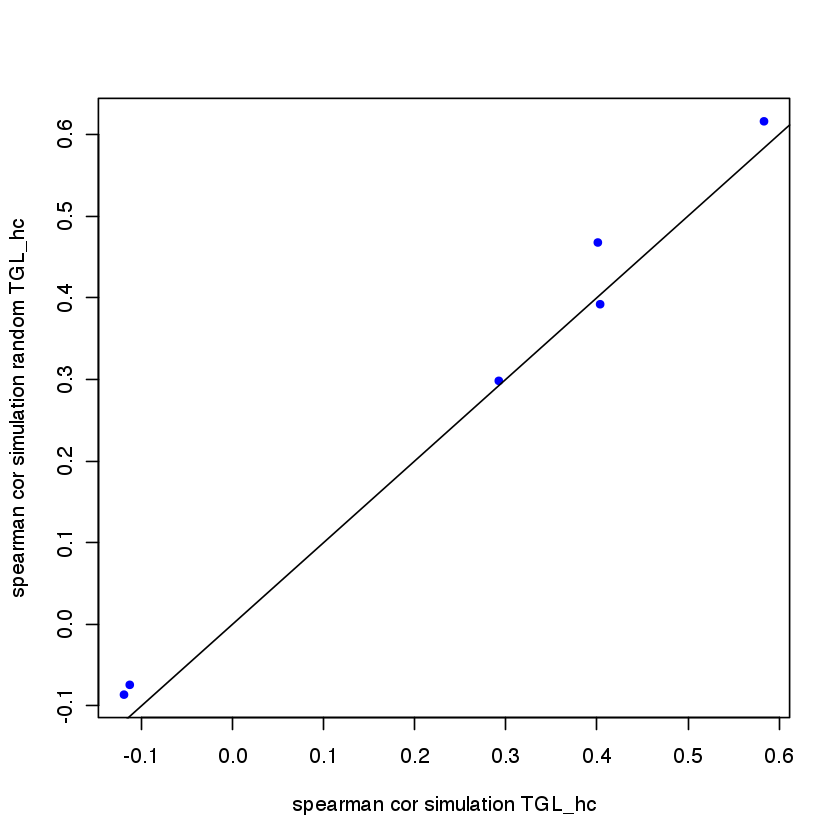

In [56]:
plot(sim.hc$test.cors.s, sim.hc.rand$test.cors.s, pch= 20, col= "blue", xlab= "spearman cor simulation TGL_hc", ylab= "spearman cor simulation random TGL_hc")
abline(a= 0, b= 1)

# Simulation #7 <a class="anchor" id="sim7"></a>

* The same as Simulation #5 but with 400 samples

In [57]:
sim <- 7

## Data Visualization

In [58]:
x <- read.table(paste("~/G_MTL_sim/sim", sim, "_features.txt", sep= ""))
y <- read.table(paste("~/G_MTL_sim/sim", sim, "_responses.txt", sep= ""))
print(dim(x))
print(dim(y))

[1] 400  15
[1] 400   6


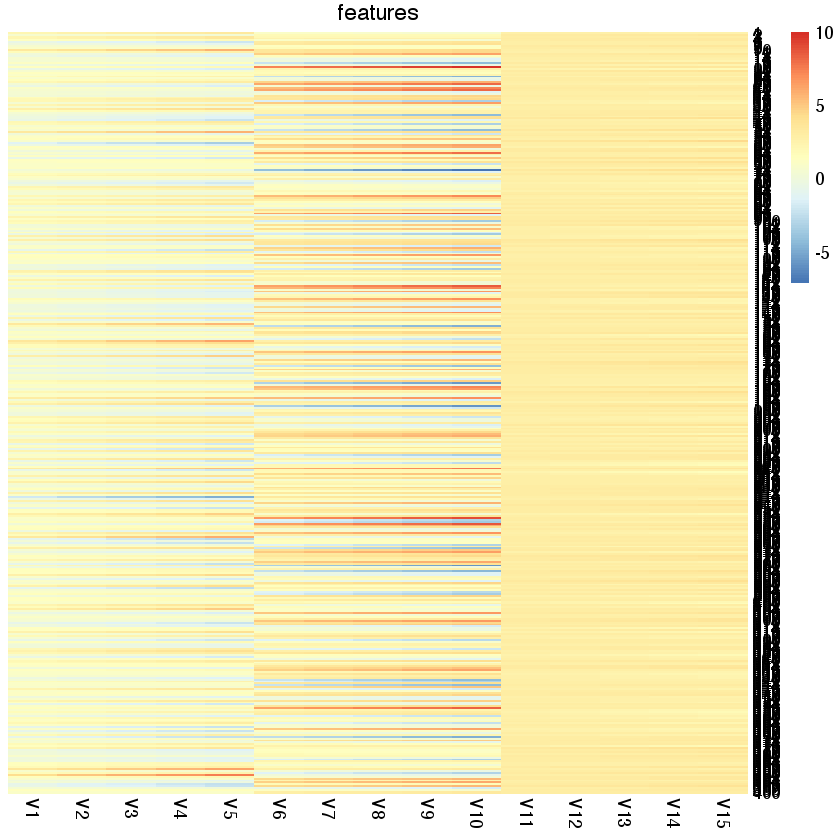

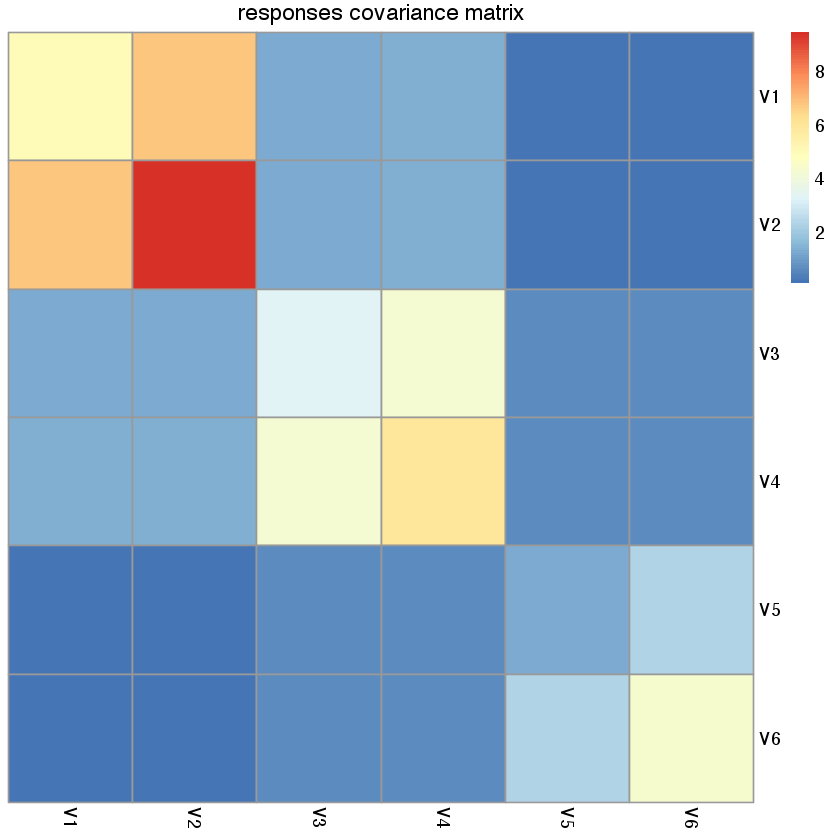

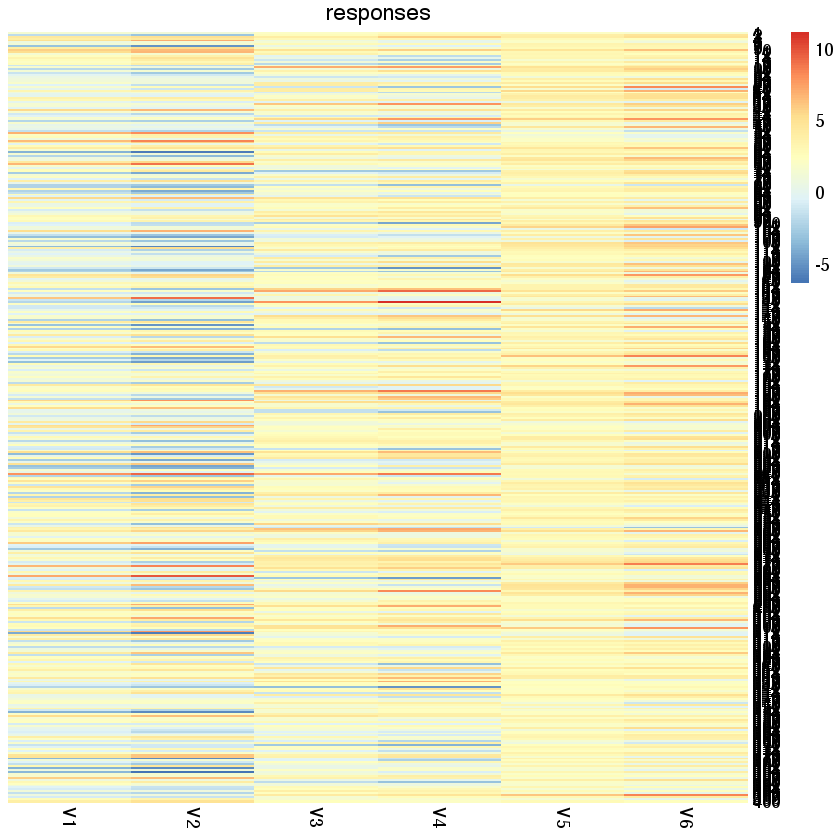

In [59]:
y.cov <- cov(y)
library(pheatmap)
pheatmap(x, cluster_rows= F, cluster_cols= F, main= "features")
pheatmap(y.cov, cluster_rows= F, cluster_cols= F, main= "responses covariance matrix")
pheatmap(y, cluster_rows= F, cluster_cols= F, main= "responses")

## Plot the kmeans clusterin of the responses to inspect how much they overlap

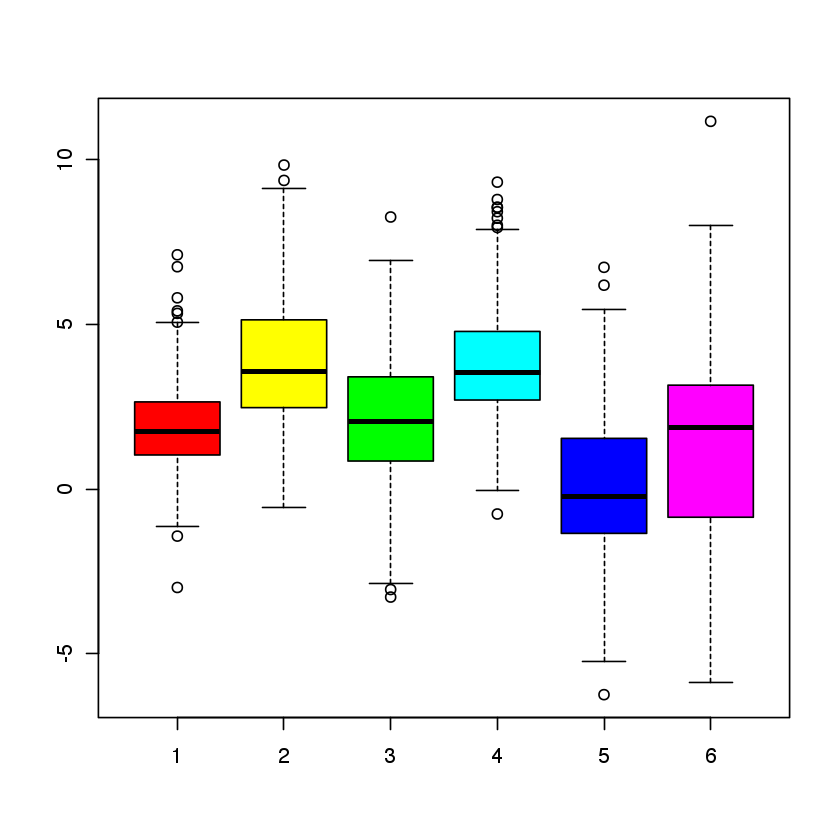

In [60]:
kmeans.res <- kmeans(y, center= 6)
kmeans.clusts <- list()
for(i in seq(6))
    kmeans.clusts[[i]] <- as.matrix(y[kmeans.res$cluster == i, ])

boxplot(kmeans.clusts, col= rainbow(length(kmeans.clusts)))

## Correlation between the responses (rows) and features (columns)

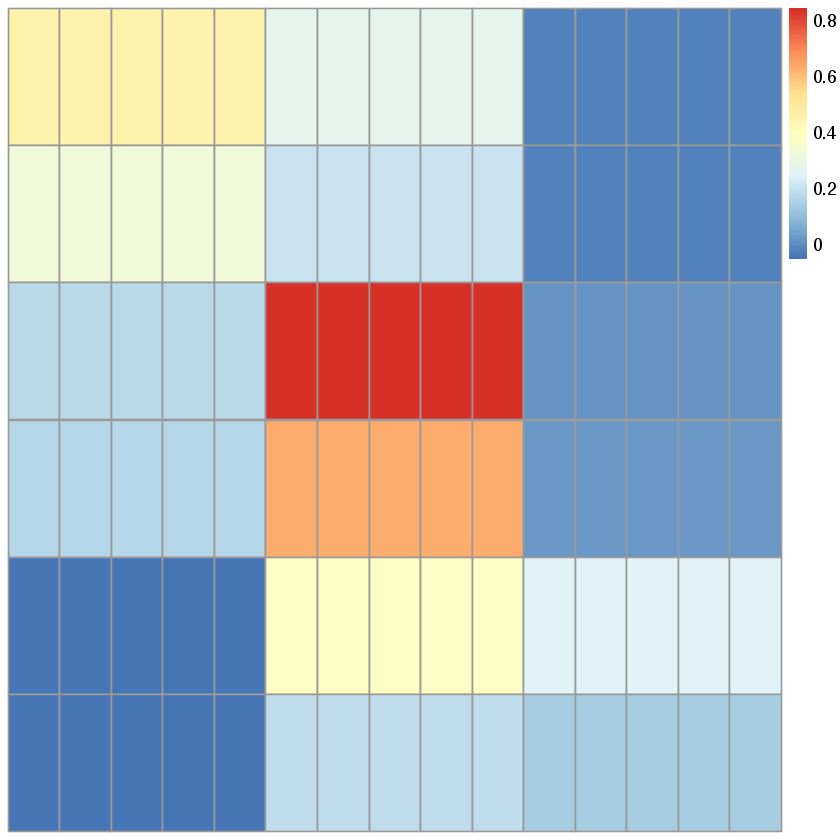

In [61]:
cors <- matrix(NA, nrow= ncol(y), ncol= ncol(x))
for(j in seq(ncol(y)))
    cors[j, ] <- sapply(seq(ncol(x)), function(i) cor(x[, i], y[, j]))
pheatmap(cors, cluster_cols = F, cluster_rows = F)

Load the TGGLasso model output based on the hirerachical tree structure approach for the current simulation

In [62]:
load(paste("~/G_MTL_sim/scMTL_HSMM_TGGLasso_hc_sim", sim, "_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc <- get.prediction.acc(partition, TGL.model.sim.rand)


Load the TGGLasso model output based on the random tree with the hirerachical tree topology for the current simulation

In [63]:
load(paste("scMTL_HSMM_TGGLasso_random_hc_sim", sim,"_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc.rand <- get.prediction.acc(partition, TGL.model.sim.rand)

## Performance visualization

### Pearson correlation

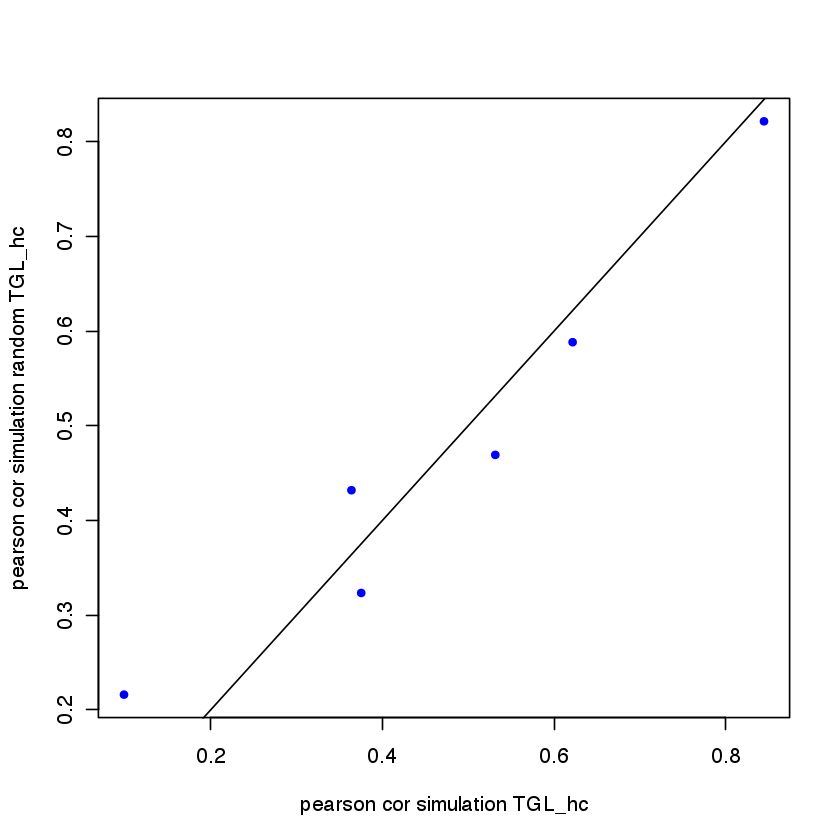

In [64]:
plot(sim.hc$test.cors.p, sim.hc.rand$test.cors.p, pch= 20, col= "blue", xlab= "pearson cor simulation TGL_hc", ylab= "pearson cor simulation random TGL_hc")
abline(a= 0, b= 1) ## Add a diagonal line

### Spearman correlation

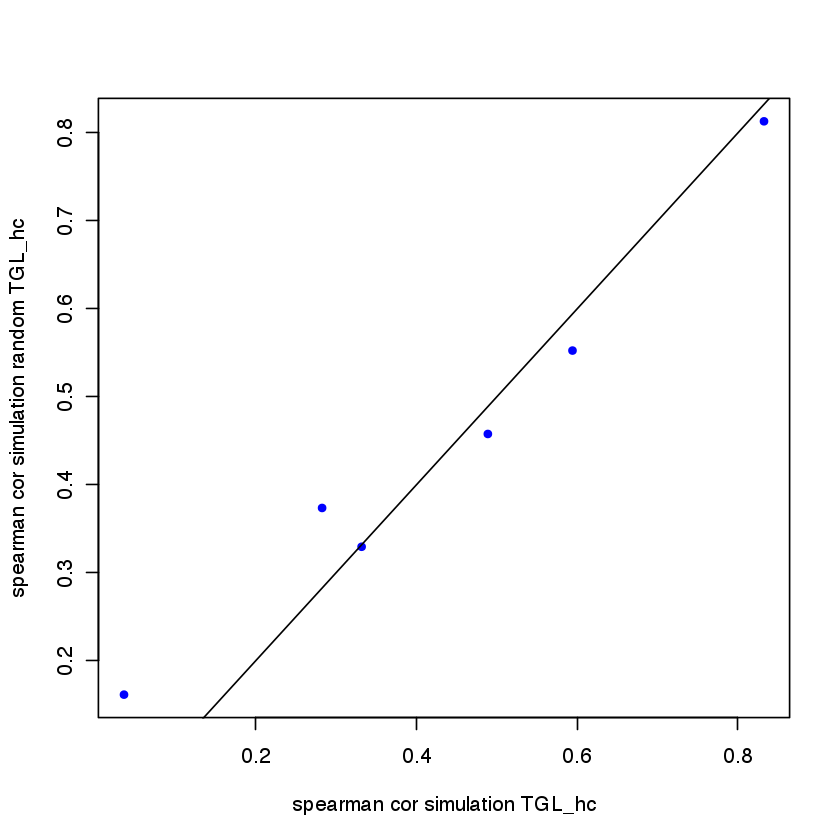

In [65]:
plot(sim.hc$test.cors.s, sim.hc.rand$test.cors.s, pch= 20, col= "blue", xlab= "spearman cor simulation TGL_hc", ylab= "spearman cor simulation random TGL_hc")
abline(a= 0, b= 1)

# Conclusion

The more overlapping the groups are, the higher the chance that the random tree starts outperforming the true tree, as shown in simulation #3.
If the association between X and Y is already good, the type of tree does not play a significant role.